In [1]:
import pandas
import numpy
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy import signal

# Funciones:

In [2]:
def mysarimax(Matriz,Y,order=(0,0,0),trend='c',seasonal_order=(0,0,0,12)):
    mod = sm.tsa.statespace.SARIMAX(Y,
                                    order=order,
                                    trend=trend,
                                    exog=numpy.asarray(Matriz),
                                    seasonal_order=seasonal_order)
    res = mod.fit(disp=False)
    res.plot_diagnostics(figsize=(18, 8))
    plt.show()
    f, Pxx_den = signal.periodogram(res.resid)
    plt.semilogy(f, Pxx_den)
    plt.xlabel('frequency [Hz]')
    plt.ylabel('Power spectral density')
    plt.show()
    DS=pandas.DataFrame()
    DS['freq']=f
    DS['pow']=Pxx_den
    DS['delay']=1/DS['freq']
    DS=DS.sort_values(by=['pow'],ascending=False).iloc[0:10]
    print(DS)
    print(res.summary())
    # Graph data
    fig, axes = plt.subplots(1, 2, figsize=(15,4))
    fig = sm.graphics.tsa.plot_acf(res.resid, lags=1000, ax=axes[0])
    fig = sm.graphics.tsa.plot_pacf(res.resid, lags=1000, ax=axes[1])
    fig, axes = plt.subplots(1, 2, figsize=(15,4))
    fig = sm.graphics.tsa.plot_acf(res.resid, lags=100, ax=axes[0])
    fig = sm.graphics.tsa.plot_pacf(res.resid, lags=100, ax=axes[1])
    # Plot data points
    fig, ax = plt.subplots(figsize=(9,4))
    ax.set(title='Temperaturas', xlabel='idx', ylabel='t°')
    Y.loc[0:1000].plot(ax=ax, style='.', label='Observada')
    res.fittedvalues[0:1000].plot(ax=ax, style='-', label='Predicha')
    legend = ax.legend(loc='upper right')
    fig, ax = plt.subplots(figsize=(9,4))
    ax.set(title='Temperaturas', xlabel='idx', ylabel='t°')
    Y.loc[0:100].plot(ax=ax, style='.', label='Observada')
    res.fittedvalues[0:100].plot(ax=ax, style='-', label='Predicha')
    legend = ax.legend(loc='upper right')
    fig, ax = plt.subplots(figsize=(9,4))
    ax.set(title='Temperaturas', xlabel='idx', ylabel='t°')
    Y.plot(ax=ax, style='.', label='Observada')
    res.fittedvalues.plot(ax=ax, style='-', label='Predicha')
    legend = ax.legend(loc='upper right')

In [3]:
def mysarima(Y,order=(0,0,0),trend='c',seasonal_order=(0,0,0,12)):
    # Fit the model
    mod = sm.tsa.statespace.SARIMAX(Y,order=order,trend=trend,seasonal_order=seasonal_order)
    res = mod.fit(disp=False)
    res.plot_diagnostics(figsize=(18, 8))
    plt.show()
    f, Pxx_den = signal.periodogram(res.resid)
    plt.semilogy(f, Pxx_den)
    plt.xlabel('frequency [Hz]')
    plt.ylabel('Power spectral density')
    plt.show()
    DS=pandas.DataFrame()
    DS['freq']=f
    DS['pow']=Pxx_den
    DS['delay']=1/DS['freq']
    DS=DS.sort_values(by=['pow'],ascending=False).iloc[0:10]
    print(DS)
    print(res.summary())
    # Graph data
    fig, axes = plt.subplots(1, 2, figsize=(15,4))
    fig = sm.graphics.tsa.plot_acf(res.resid, lags=1000, ax=axes[0])
    fig = sm.graphics.tsa.plot_pacf(res.resid, lags=1000, ax=axes[1])
    fig, axes = plt.subplots(1, 2, figsize=(15,4))
    fig = sm.graphics.tsa.plot_acf(res.resid, lags=100, ax=axes[0])
    fig = sm.graphics.tsa.plot_pacf(res.resid, lags=100, ax=axes[1])
    # Plot data points
    fig, ax = plt.subplots(figsize=(9,4))
    ax.set(title='Temperaturas', xlabel='idx', ylabel='t°')
    Y.loc[0:1000].plot(ax=ax, style='.', label='Observada')
    res.fittedvalues[0:1000].plot(ax=ax, style='-', label='Predicha')
    legend = ax.legend(loc='upper right')
    fig, ax = plt.subplots(figsize=(9,4))
    ax.set(title='Temperaturas', xlabel='idx', ylabel='t°')
    Y.loc[0:100].plot(ax=ax, style='.', label='Observada')
    res.fittedvalues[0:100].plot(ax=ax, style='-', label='Predicha')
    legend = ax.legend(loc='upper right')
    fig, ax = plt.subplots(figsize=(9,4))
    ax.set(title='Temperaturas', xlabel='idx', ylabel='t°')
    Y.plot(ax=ax, style='.', label='Observada')
    res.fittedvalues.plot(ax=ax, style='-', label='Predicha')
    legend = ax.legend(loc='upper right')

In [4]:
def mysarimax2(Matriz,Y,order=(0,0,0),trend='c',seasonal_order=(0,0,0,12),restriccion={}):
    mod = sm.tsa.statespace.SARIMAX(Y,
                                    order=order,
                                    trend=trend,
                                    exog=numpy.asarray(Matriz),
                                    seasonal_order=seasonal_order,
                                    enforce_stationarity=False,
                                    enforce_invertibility=False)
    res = mod.fit_constrained(restriccion)
    res.plot_diagnostics(figsize=(18, 8))
    plt.show()
    f, Pxx_den = signal.periodogram(res.resid)
    plt.semilogy(f, Pxx_den)
    plt.xlabel('frequency [Hz]')
    plt.ylabel('Power spectral density')
    plt.show()
    DS=pandas.DataFrame()
    DS['freq']=f
    DS['pow']=Pxx_den
    DS['delay']=1/DS['freq']
    DS=DS.sort_values(by=['pow'],ascending=False).iloc[0:10]
    print(DS)
    print(res.summary())
    # Graph data
    fig, axes = plt.subplots(1, 2, figsize=(15,4))
    fig = sm.graphics.tsa.plot_acf(res.resid, lags=1000, ax=axes[0])
    fig = sm.graphics.tsa.plot_pacf(res.resid, lags=1000, ax=axes[1])
    fig, axes = plt.subplots(1, 2, figsize=(15,4))
    fig = sm.graphics.tsa.plot_acf(res.resid, lags=100, ax=axes[0])
    fig = sm.graphics.tsa.plot_pacf(res.resid, lags=100, ax=axes[1])
    # Plot data points
    fig, ax = plt.subplots(figsize=(9,4))
    ax.set(title='Temperaturas', xlabel='idx', ylabel='t°')
    Y.loc[0:1000].plot(ax=ax, style='.', label='Observada')
    res.fittedvalues[0:1000].plot(ax=ax, style='-', label='Predicha')
    legend = ax.legend(loc='upper right')
    fig, ax = plt.subplots(figsize=(9,4))
    ax.set(title='Temperaturas', xlabel='idx', ylabel='t°')
    Y.loc[0:100].plot(ax=ax, style='.', label='Observada')
    res.fittedvalues[0:100].plot(ax=ax, style='-', label='Predicha')
    legend = ax.legend(loc='upper right')
    fig, ax = plt.subplots(figsize=(9,4))
    ax.set(title='Temperaturas', xlabel='idx', ylabel='t°')
    Y.plot(ax=ax, style='.', label='Observada')
    res.fittedvalues.plot(ax=ax, style='-', label='Predicha')
    legend = ax.legend(loc='upper right')

In [5]:
def mysarima2(Y,order=(0,0,0),trend='c',restriccion={},seasonal_order=(0,0,0,12)):
    # Fit the model
    mod = sm.tsa.statespace.SARIMAX(Y,order=order,trend=trend,
                                    enforce_invertibility=False,
                                    seasonal_order=seasonal_order)
    res = mod.fit_constrained(restriccion)
    res.plot_diagnostics(figsize=(18, 8))
    plt.show()
    f, Pxx_den = signal.periodogram(res.resid)
    plt.semilogy(f, Pxx_den)
    plt.xlabel('frequency [Hz]')
    plt.ylabel('Power spectral density')
    plt.show()
    DS=pandas.DataFrame()
    DS['freq']=f
    DS['pow']=Pxx_den
    DS['delay']=1/DS['freq']
    DS=DS.sort_values(by=['pow'],ascending=False).iloc[0:10]
    print(DS)
    print(res.summary())
    # Graph data
    fig, axes = plt.subplots(1, 2, figsize=(15,4))
    fig = sm.graphics.tsa.plot_acf(res.resid, lags=1000, ax=axes[0])
    fig = sm.graphics.tsa.plot_pacf(res.resid, lags=1000, ax=axes[1])
    fig, axes = plt.subplots(1, 2, figsize=(15,4))
    fig = sm.graphics.tsa.plot_acf(res.resid, lags=100, ax=axes[0])
    fig = sm.graphics.tsa.plot_pacf(res.resid, lags=100, ax=axes[1])
    # Plot data points
    fig, ax = plt.subplots(figsize=(9,4))
    ax.set(title='Temperaturas', xlabel='idx', ylabel='t°')
    Y.loc[0:1000].plot(ax=ax, style='.', label='Observada')
    res.fittedvalues[0:1000].plot(ax=ax, style='-', label='Predicha')
    legend = ax.legend(loc='upper right')
    fig, ax = plt.subplots(figsize=(9,4))
    ax.set(title='Temperaturas', xlabel='idx', ylabel='t°')
    Y.loc[0:100].plot(ax=ax, style='.', label='Observada')
    res.fittedvalues[0:100].plot(ax=ax, style='-', label='Predicha')
    legend = ax.legend(loc='upper right')
    fig, ax = plt.subplots(figsize=(9,4))
    ax.set(title='Temperaturas', xlabel='idx', ylabel='t°')
    Y.plot(ax=ax, style='.', label='Observada')
    res.fittedvalues.plot(ax=ax, style='-', label='Predicha')
    legend = ax.legend(loc='upper right')

# Ejecución:

In [6]:
Matriz=pandas.read_csv('Pichilemu.csv',sep='|')
Matriz

Unnamed: 0              momento  rrInst  rr6Horas  rr24Horas    hr  \
0                 0  2018-01-10 02:31:00     0.0       0.0        0.0  92.6   
1                 1  2018-01-10 02:32:00     0.0       0.0        0.0  92.5   
2                 2  2018-01-10 02:33:00     0.0       0.0        0.0  92.6   
3                 3  2018-01-10 02:34:00     0.0       0.0        0.0  92.5   
4                 4  2018-01-10 02:35:00     0.0       0.0        0.0  92.5   
...             ...                  ...     ...       ...        ...   ...   
1034028     1034574  2019-12-31 23:56:00     0.0       0.0        0.0  84.9   
1034029     1034575  2019-12-31 23:57:00     0.0       0.0        0.0  85.0   
1034030     1034576  2019-12-31 23:58:00     0.0       0.0        0.0  85.0   
1034031     1034577  2019-12-31 23:59:00     0.0       0.0        0.0  84.9   
1034032     1034578  2020-01-01 00:00:00     0.0       0.0        0.0  84.9   

             p0    qfe1     qff     qnh  ...    td  tMin12Horas  tMax12Horas  \
0        1010.4  1010.5  1014.1  1014.1  ...  13.6         15.5         16.6   
1        1010.4  1010.5  1014.1  1014.1  ...  13.6         15.5         16.6   
2        1010.3  1010.5  1014.1  1014.1  ...  13.6         15.5         16.6   
3        1010.3  1010.4  1014.0  1014.0  ...  13.6         15.5         16.6   
4        1010.4  1010.4  1014.0  1014.0  ...  13.6         15.5         16.6   
...         ...     ...     ...     ...  ...   ...          ...          ...   
1034028  1009.5  1009.7  1013.3  1013.3  ...  12.9         10.9         15.0   
1034029  1009.5  1009.6  1013.2  1013.2  ...  13.0         10.9         15.0   
1034030  1009.5  1009.7  1013.3  1013.3  ...  12.9         10.9         15.0   
1034031  1009.5  1009.7  1013.3  1013.3  ...  12.8         10.9         15.0   
1034032  1009.5  1009.7  1013.3  1013.3  ...  12.9         12.6         17.2   

         Anno  Mes  Dia  Hora  Minuto  Hora_Min_t  Hora_Max_t  
0        2018    1   10     2      31          23          22  
1        2018    1   10     2      32          23          22  
2        2018    1   10     2      33          23          22  
3        2018    1   10     2      34          23          22  
4        2018    1   10     2      35          23          22  
...       ...  ...  ...   ...     ...         ...         ...  
1034028  2019   12   31    23      56           9           0  
1034029  2019   12   31    23      57           9           0  
1034030  2019   12   31    23      58           9           0  
1034031  2019   12   31    23      59           9           0  
1034032  2020    1    1     0       0          12          21  

[1034033 rows x 29 columns]

In [7]:
Matriz_Resultados=Matriz.loc[:,'ts']

In [8]:
Matriz_Informacion_general=Matriz.loc[:,['rr6Horas','rr24Horas','radiacionGlobalAcumulada24Horas',
                                  'tMin12Horas','tMax12Horas','Mes','Hora','Hora_Min_t','Hora_Max_t']]

In [9]:
Intervalo=45#cada cuantos minutos consideramos valor

In [10]:
Matriz_Informacion_general=Matriz_Informacion_general.loc[range(0,len(Matriz_Resultados),Intervalo),:].reset_index().drop('index',axis=1)
Matriz_Resultados=Matriz_Resultados.loc[range(0,len(Matriz_Resultados),Intervalo)].reset_index().drop('index',axis=1)

In [11]:
IG=pandas.DataFrame()
for k in range(1,24):
    IG['H'+str(k)]=1*(Matriz_Informacion_general['Hora']==k)
for k in range(1,12):
    IG['M'+str(k)]=1*(Matriz_Informacion_general['Mes']==k)
IG['Constante']=1*(True)
IG['rr6Horas']=1*(Matriz_Informacion_general['rr6Horas'])
IG['rr24Horas']=1*(Matriz_Informacion_general['rr24Horas'])
IG['radiacionGlobalAcumulada24Horas']=1*(Matriz_Informacion_general['radiacionGlobalAcumulada24Horas'])
IG['tMin12Horas']=1*(Matriz_Informacion_general['tMin12Horas'])
IG['tMax12Horas']=1*(Matriz_Informacion_general['tMax12Horas'])
IG['Hora_Min_t']=1*(Matriz_Informacion_general['Hora_Min_t'])
IG['Hora_Max_t']=1*(Matriz_Informacion_general['Hora_Max_t'])

In [12]:
IG

H1  H2  H3  H4  H5  H6  H7  H8  H9  H10  ...  M10  M11  Constante  \
0       0   1   0   0   0   0   0   0   0    0  ...    0    0          1   
1       0   0   1   0   0   0   0   0   0    0  ...    0    0          1   
2       0   0   0   1   0   0   0   0   0    0  ...    0    0          1   
3       0   0   0   1   0   0   0   0   0    0  ...    0    0          1   
4       0   0   0   0   1   0   0   0   0    0  ...    0    0          1   
...    ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ...  ...  ...        ...   
22974   0   0   0   0   0   0   0   0   0    0  ...    0    0          1   
22975   0   0   0   0   0   0   0   0   0    0  ...    0    0          1   
22976   0   0   0   0   0   0   0   0   0    0  ...    0    0          1   
22977   0   0   0   0   0   0   0   0   0    0  ...    0    0          1   
22978   0   0   0   0   0   0   0   0   0    0  ...    0    0          1   

       rr6Horas  rr24Horas  radiacionGlobalAcumulada24Horas  tMin12Horas  \
0           0.0        0.0                              6.7         15.5   
1           0.0        0.0                              6.7         15.5   
2           0.0        0.0                              6.7         15.5   
3           0.0        0.0                              6.7         15.5   
4           0.0        0.0                              6.7         15.5   
...         ...        ...                              ...          ...   
22974       0.0        0.0                            693.7         10.9   
22975       0.0        0.0                            693.7         10.9   
22976       0.0        0.0                            693.7         10.9   
22977       0.0        0.0                            693.7         10.9   
22978       0.0        0.0                            693.7         10.9   

       tMax12Horas  Hora_Min_t  Hora_Max_t  
0             16.6          23          22  
1             16.6          23          22  
2             16.6          23          22  
3             16.6          23          22  
4             16.6          23          22  
...            ...         ...         ...  
22974         15.0           9           0  
22975         15.0           9           0  
22976         15.0           9           0  
22977         15.0           9           0  
22978         15.0           9           0  

[22979 rows x 42 columns]

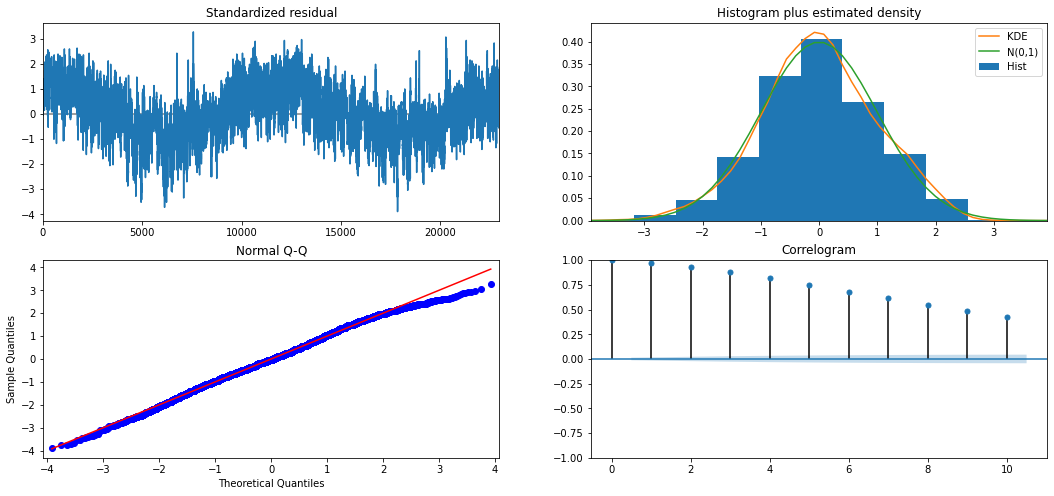

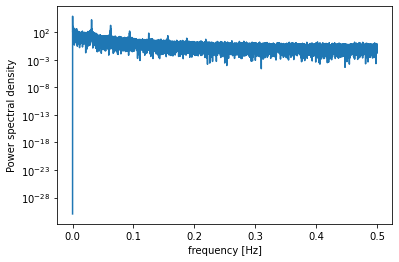

          freq           pow         delay
2     0.000087  81103.197518  11489.500000
718   0.031246  18108.252580     32.004178
717   0.031202  10181.937962     32.048815
719   0.031289   9738.222420     31.959666
720   0.031333   5946.059958     31.915278
716   0.031159   2984.944820     32.093575
721   0.031376   2569.587370     31.871012
1436  0.062492   1798.181302     16.002089
712   0.030985   1292.963670     32.273876
17    0.000740   1123.200422   1351.705882
                               SARIMAX Results                                
Dep. Variable:                     ts   No. Observations:                22979
Model:                        SARIMAX   Log Likelihood              -57432.352
Date:                Fri, 07 Aug 2020   AIC                         114868.704
Time:                        18:19:48   BIC                         114884.789
Sample:                             0   HQIC                        114873.932
                              - 22979                

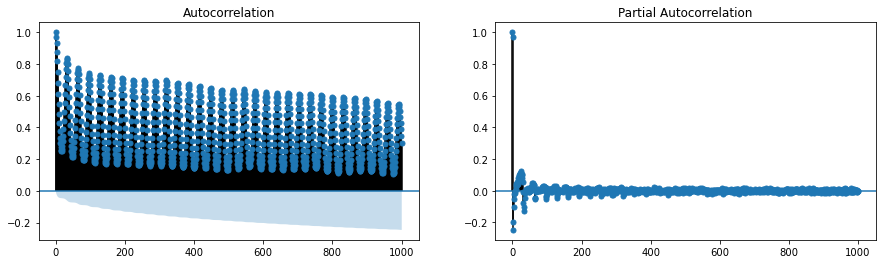

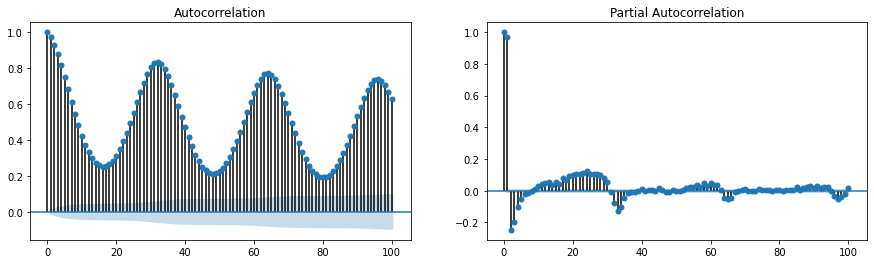

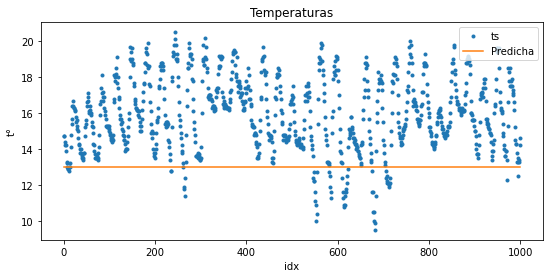

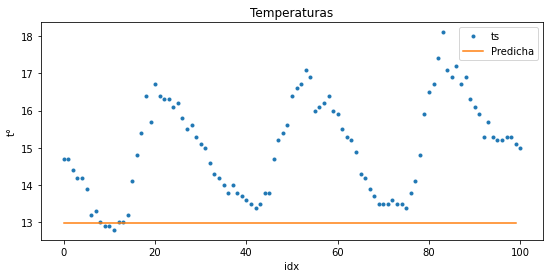

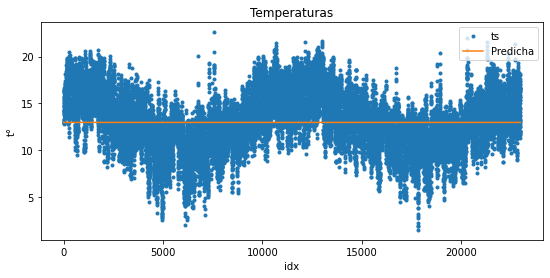

In [13]:
mysarima(Y=Matriz_Resultados)

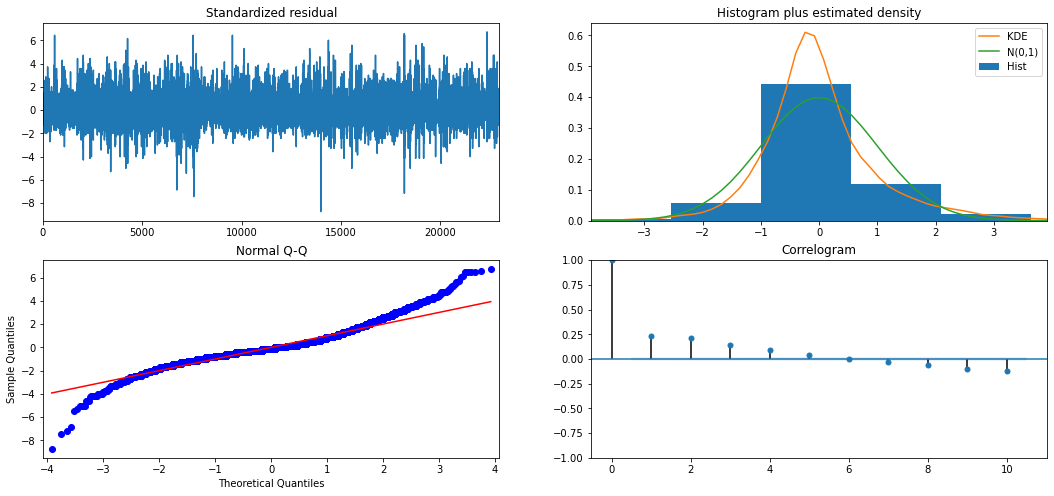

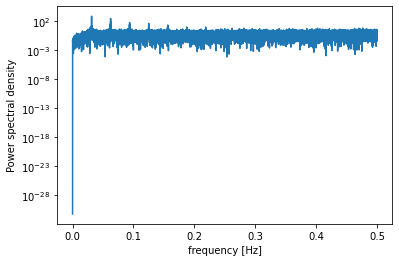

          freq         pow      delay
718   0.031246  688.107137  32.004178
717   0.031202  393.248063  32.048815
719   0.031289  370.858394  31.959666
1436  0.062492  278.535706  16.002089
720   0.031333  225.324649  31.915278
1438  0.062579  153.100672  15.979833
716   0.031159  111.056978  32.093575
721   0.031376  100.633263  31.871012
1439  0.062622   72.705729  15.968728
2154  0.093738   54.146480  10.668059
                               SARIMAX Results                                
Dep. Variable:                     ts   No. Observations:                22979
Model:               SARIMAX(0, 1, 0)   Log Likelihood              -24381.047
Date:                Fri, 07 Aug 2020   AIC                          48766.094
Time:                        18:20:18   BIC                          48782.179
Sample:                             0   HQIC                         48771.322
                              - 22979                                         
Covariance Type:             

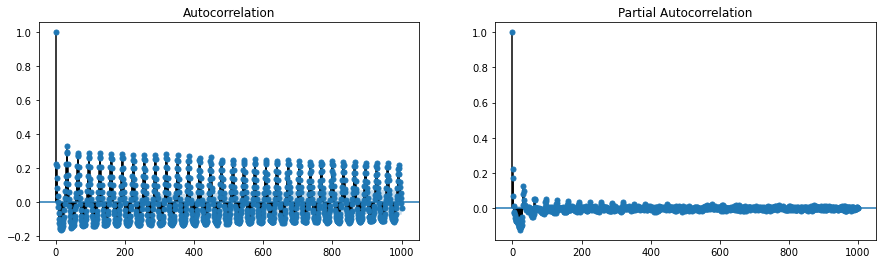

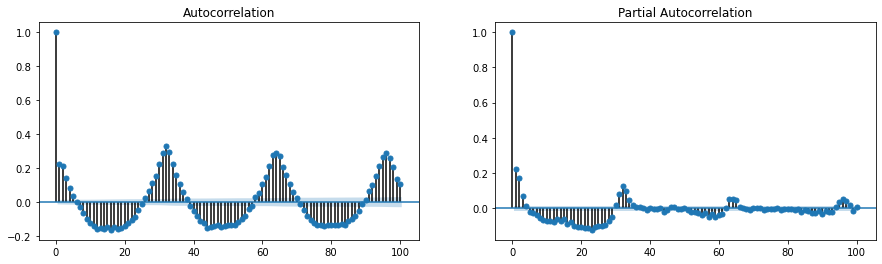

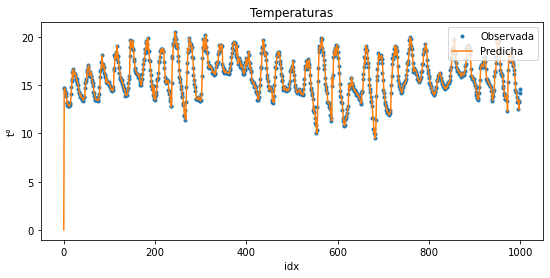

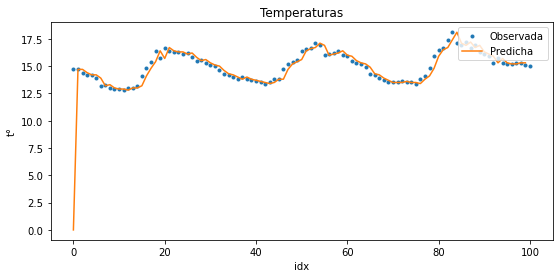

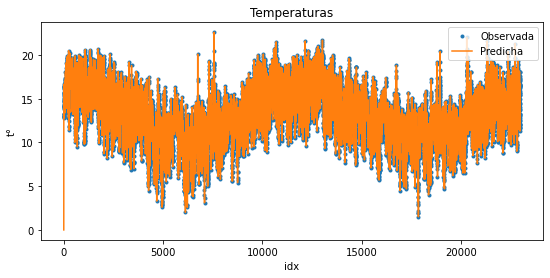

In [14]:
mysarima(Y=Matriz_Resultados['ts'],order=(0,1,0))

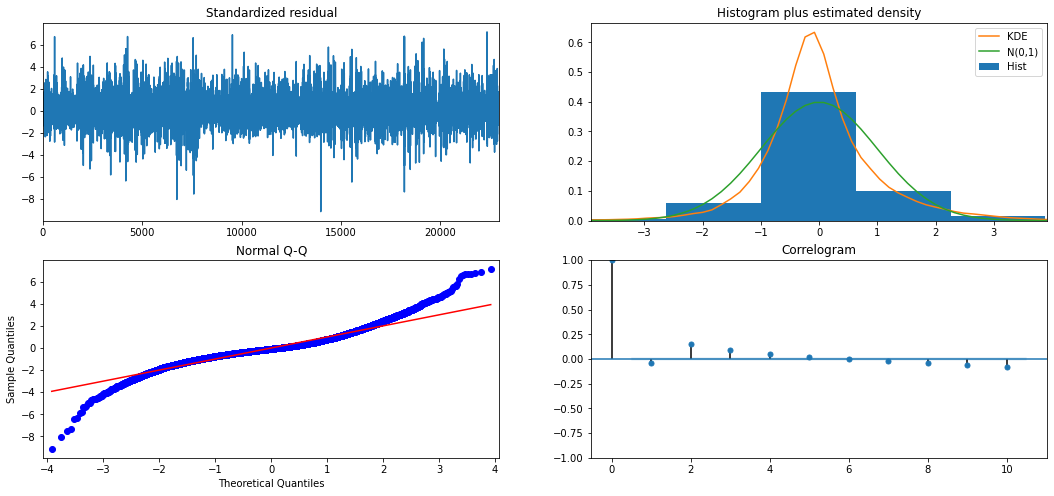

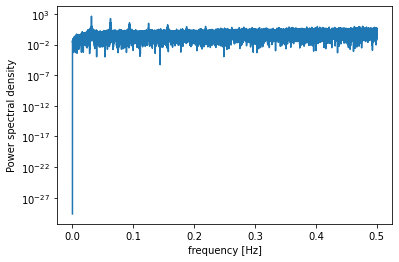

          freq         pow      delay
718   0.031246  413.940075  32.004178
717   0.031202  237.917444  32.048815
719   0.031289  222.949530  31.959666
1436  0.062492  175.939292  16.002089
720   0.031333  135.311729  31.915278
1438  0.062579   96.510712  15.979833
716   0.031159   66.513122  32.093575
721   0.031376   61.000442  31.871012
1439  0.062622   46.024304  15.968728
2154  0.093738   36.197995  10.668059
                               SARIMAX Results                                
Dep. Variable:                     ts   No. Observations:                22979
Model:               SARIMAX(1, 1, 0)   Log Likelihood              -23762.480
Date:                Fri, 07 Aug 2020   AIC                          47530.959
Time:                        18:20:48   BIC                          47555.086
Sample:                             0   HQIC                         47538.800
                              - 22979                                         
Covariance Type:             

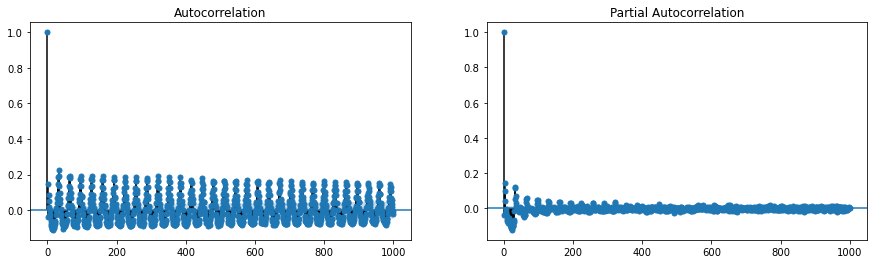

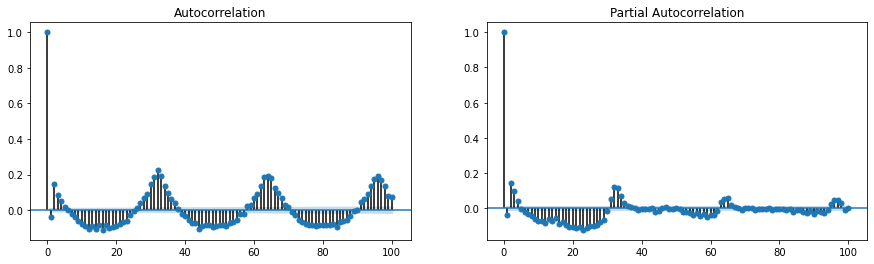

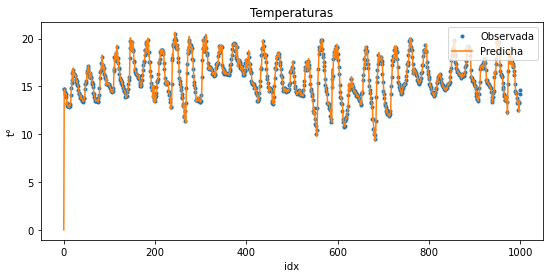

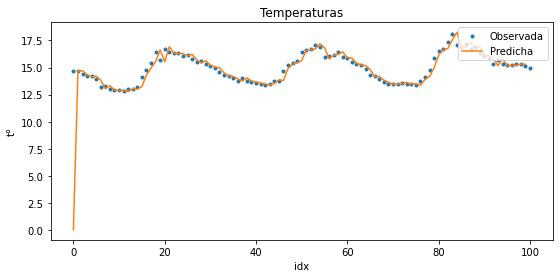

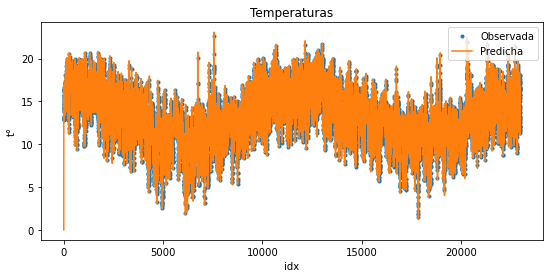

In [15]:
mysarima(Y=Matriz_Resultados['ts'],order=(1,1,0))

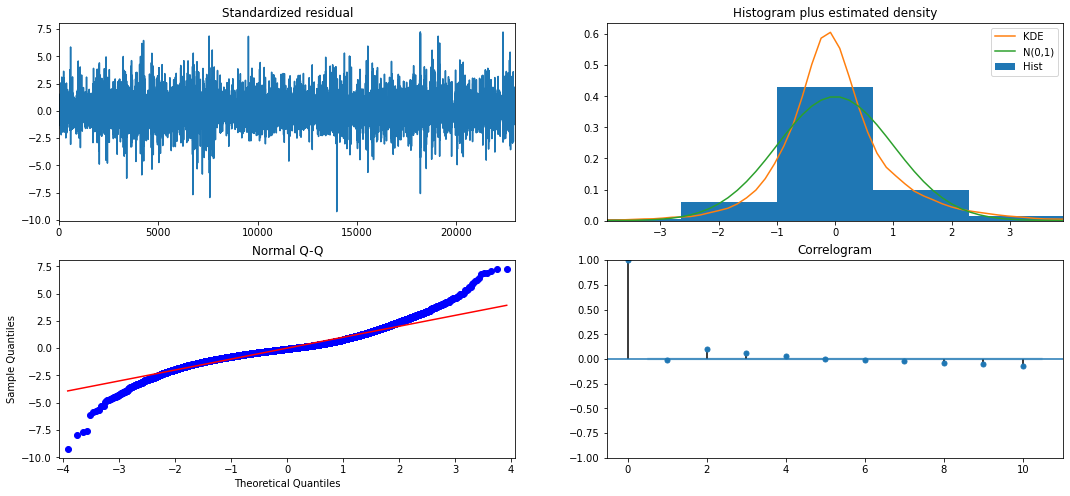

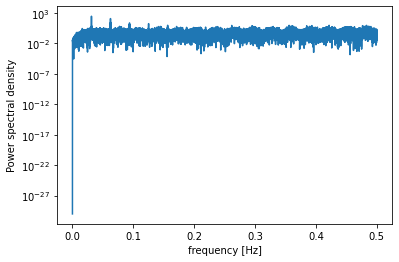

          freq         pow      delay
718   0.031246  286.294884  32.004178
717   0.031202  164.455339  32.048815
719   0.031289  154.377163  31.959666
1436  0.062492  118.551982  16.002089
720   0.031333   93.472155  31.915278
1438  0.062579   64.530004  15.979833
716   0.031159   46.002353  32.093575
721   0.031376   42.107048  31.871012
1439  0.062622   31.153429  15.968728
2154  0.093738   22.863262  10.668059
                                     SARIMAX Results                                      
Dep. Variable:                                 ts   No. Observations:                22979
Model:             SARIMAX(1, 1, 0)x(1, 0, 0, 32)   Log Likelihood              -22955.560
Date:                            Fri, 07 Aug 2020   AIC                          45919.120
Time:                                    18:30:02   BIC                          45951.290
Sample:                                         0   HQIC                         45929.575
                                    

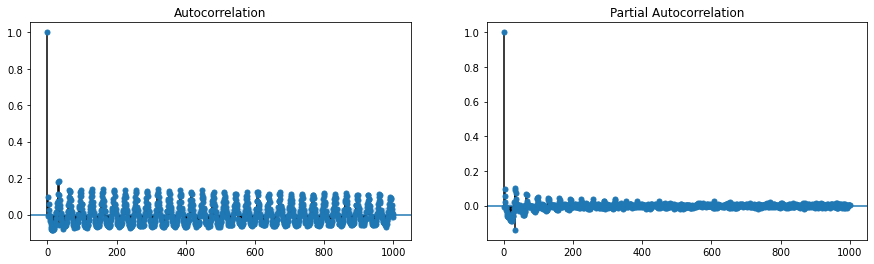

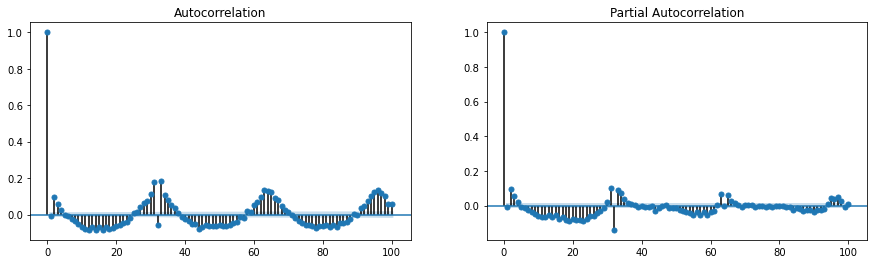

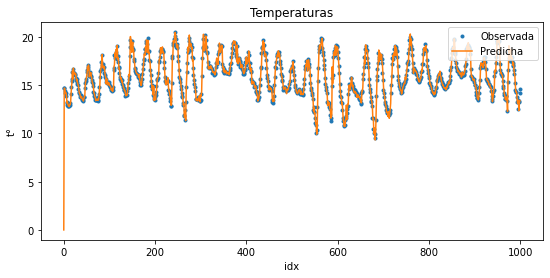

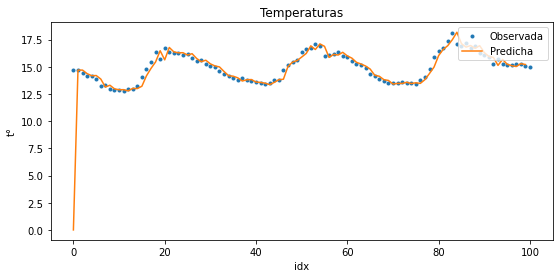

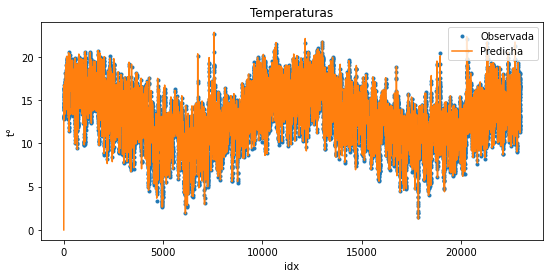

In [17]:
mysarima(Y=Matriz_Resultados['ts'],
         order=(1,1,0),
         seasonal_order=(1,0,0,60*24/Intervalo))

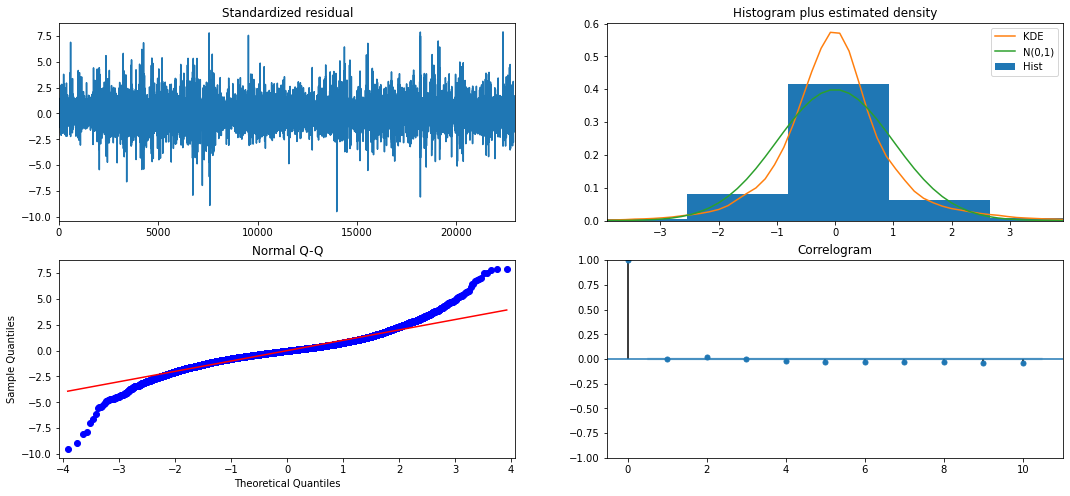

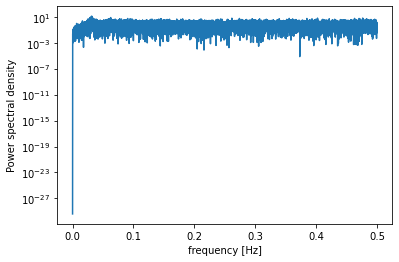

          freq        pow      delay
712   0.030985  12.288585  32.273876
736   0.032029  11.625174  31.221467
718   0.031246   9.902966  32.004178
720   0.031333   9.632973  31.915278
719   0.031289   8.819770  31.959666
717   0.031202   7.839457  32.048815
666   0.028983   7.818552  34.503003
1438  0.062579   7.656579  15.979833
716   0.031159   7.579895  32.093575
728   0.031681   7.477917  31.564560
                                      SARIMAX Results                                       
Dep. Variable:                                   ts   No. Observations:                22979
Model:             SARIMAX(1, 1, 0)x(1, 0, [1], 32)   Log Likelihood              -21047.834
Date:                              Fri, 07 Aug 2020   AIC                          42105.668
Time:                                      18:28:16   BIC                          42145.879
Sample:                                           0   HQIC                         42118.736
                                   

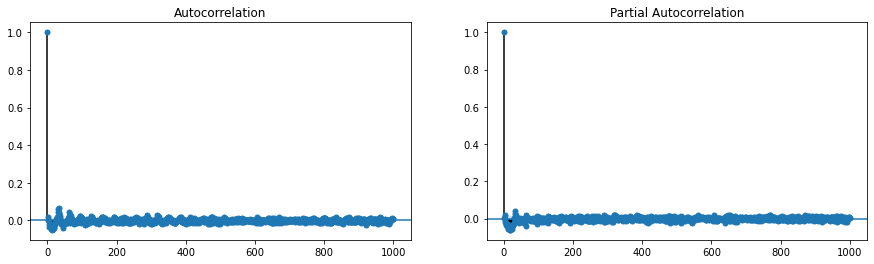

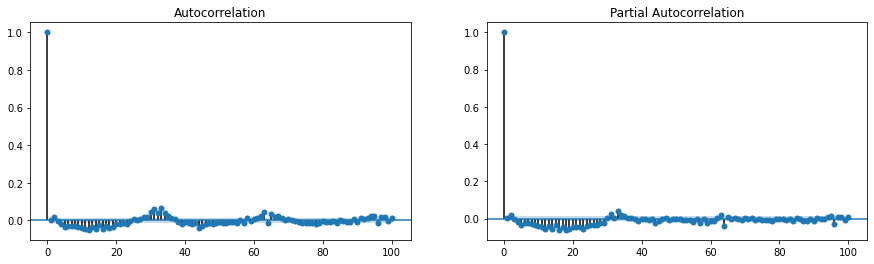

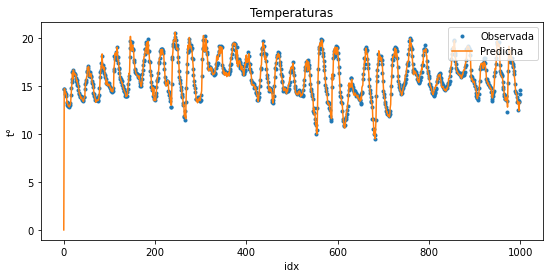

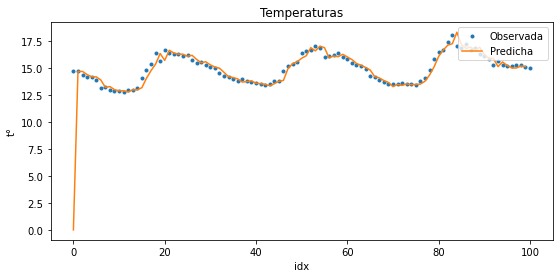

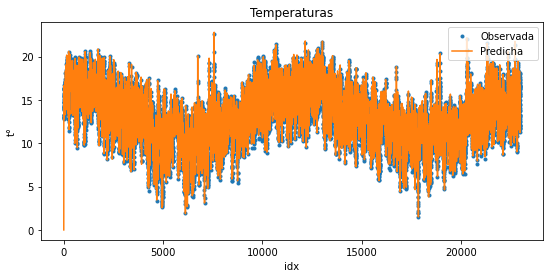

In [16]:
mysarima(Y=Matriz_Resultados['ts'],
         order=(1,1,0),
         seasonal_order=(1,0,1,60*24/Intervalo))

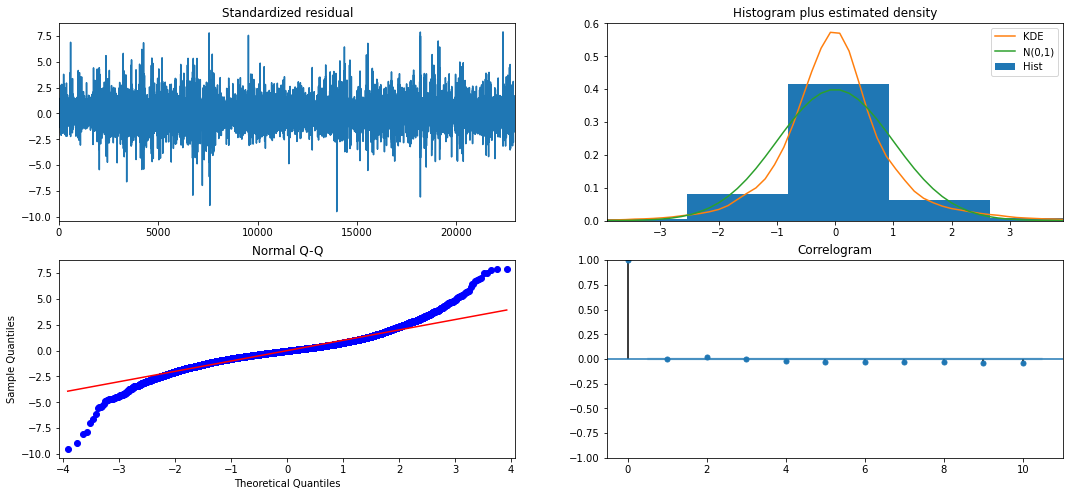

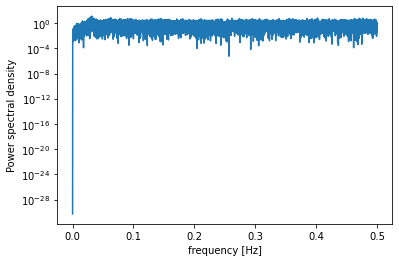

          freq        pow      delay
712   0.030985  12.308081  32.273876
736   0.032029  11.587490  31.221467
718   0.031246   9.899792  32.004178
720   0.031333   9.620012  31.915278
719   0.031289   8.805781  31.959666
666   0.028983   7.968901  34.503003
717   0.031202   7.840525  32.048815
1438  0.062579   7.660331  15.979833
716   0.031159   7.565921  32.093575
705   0.030680   7.485511  32.594326
                                      SARIMAX Results                                       
Dep. Variable:                                   ts   No. Observations:                22979
Model:             SARIMAX(1, 1, 0)x(1, 0, [1], 32)   Log Likelihood              -21040.702
Date:                              Fri, 07 Aug 2020   AIC                          42113.404
Time:                                      19:16:01   BIC                          42242.081
Sample:                                           0   HQIC                         42155.222
                                   

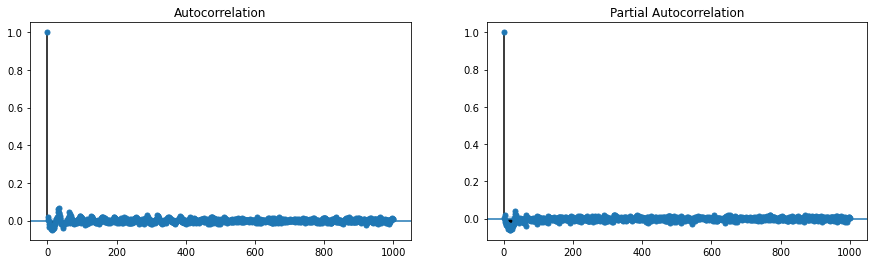

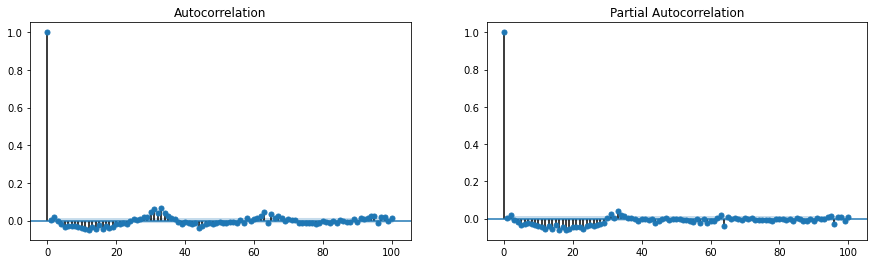

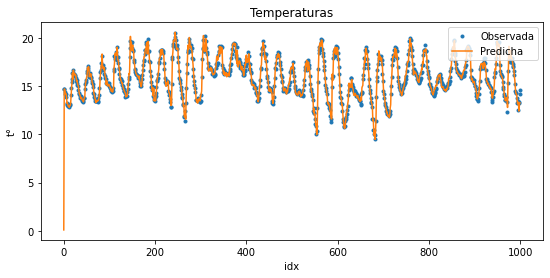

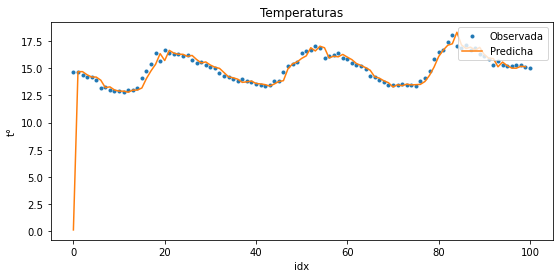

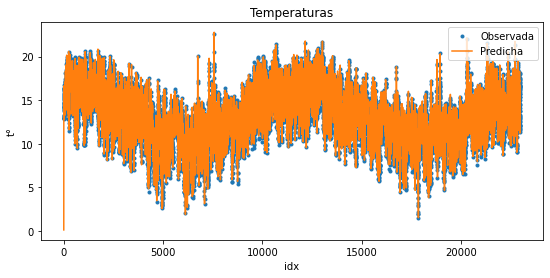

In [21]:
mysarimax(Y=Matriz_Resultados['ts'],
         order=(1,1,0),
         seasonal_order=(1,0,1,60*24/Intervalo),
         Matriz=IG.loc[:,['M1','M2','M3','M4','M5','M6','M7','M8','M9','M10','M11']])

/home/matias/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


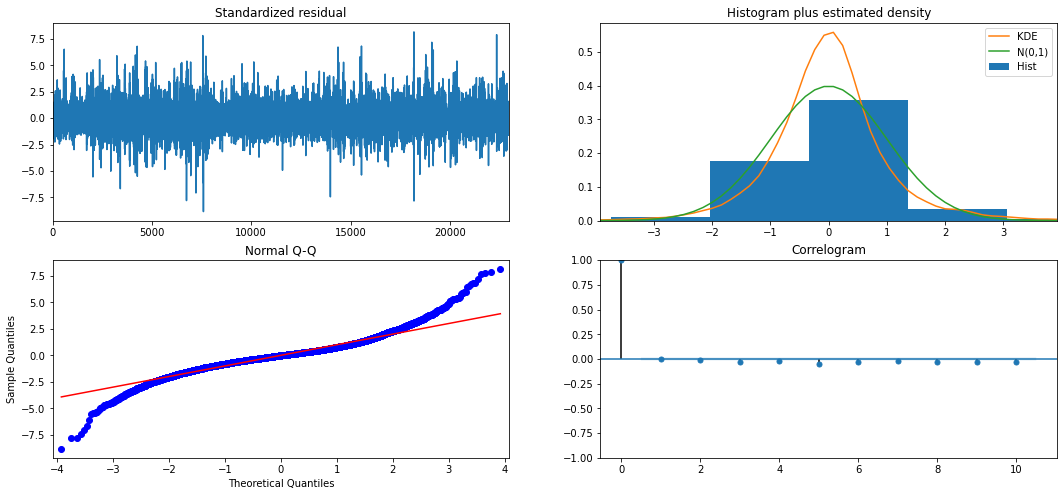

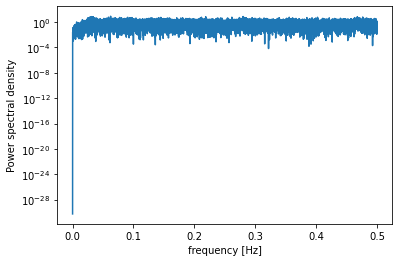

           freq       pow      delay
1436   0.062492  8.090918  16.002089
6440   0.280256  7.281717   3.568168
718    0.031246  7.053005  32.004178
5025   0.218678  6.842985   4.572935
736    0.032029  6.649901  31.221467
10750  0.467818  6.641557   2.137581
776    0.033770  6.393917  29.612113
666    0.028983  6.355999  34.503003
6438   0.280169  6.340037   3.569276
10952  0.476609  6.097432   2.098156
                                      SARIMAX Results                                       
Dep. Variable:                                   ts   No. Observations:                22979
Model:             SARIMAX(1, 1, 0)x(1, 0, [1], 32)   Log Likelihood              -21000.650
Date:                              Fri, 07 Aug 2020   AIC                          42057.301
Time:                                      19:47:23   BIC                          42282.485
Sample:                                           0   HQIC                         42130.482
                                   

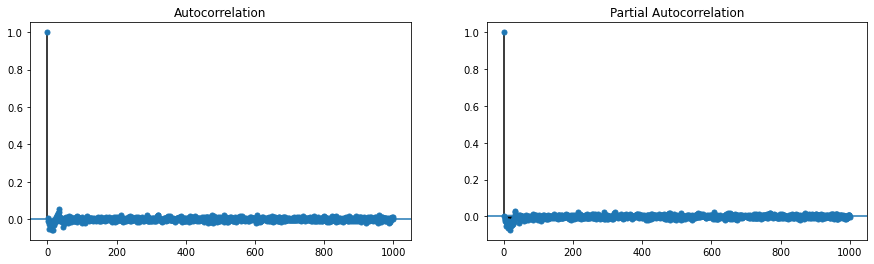

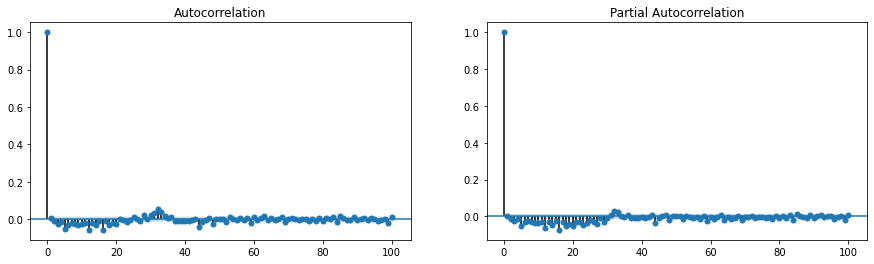

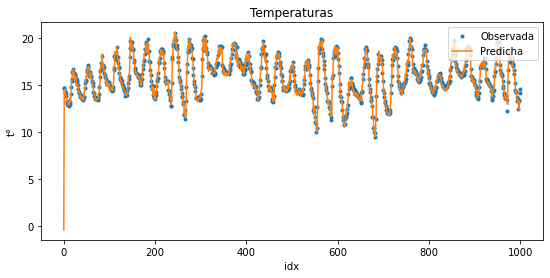

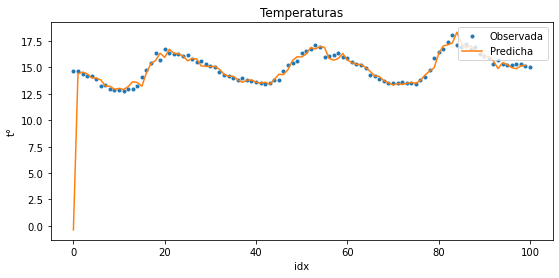

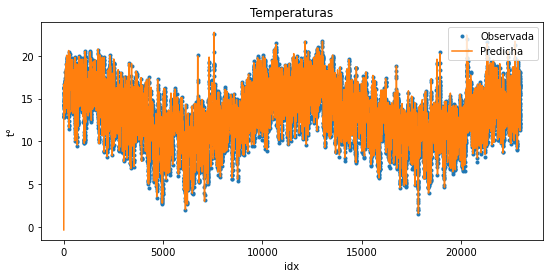

In [22]:
mysarimax(Y=Matriz_Resultados['ts'],
         order=(1,1,0),
         seasonal_order=(1,0,1,60*24/Intervalo),
          Matriz=IG.loc[:,['H1','H2','H3','H4','H5','H6','H7','H8',
                           'H9','H10','H11','H12','H13','H14','H15',
                           'H16','H17','H18','H19','H20','H21','H22','H23']])

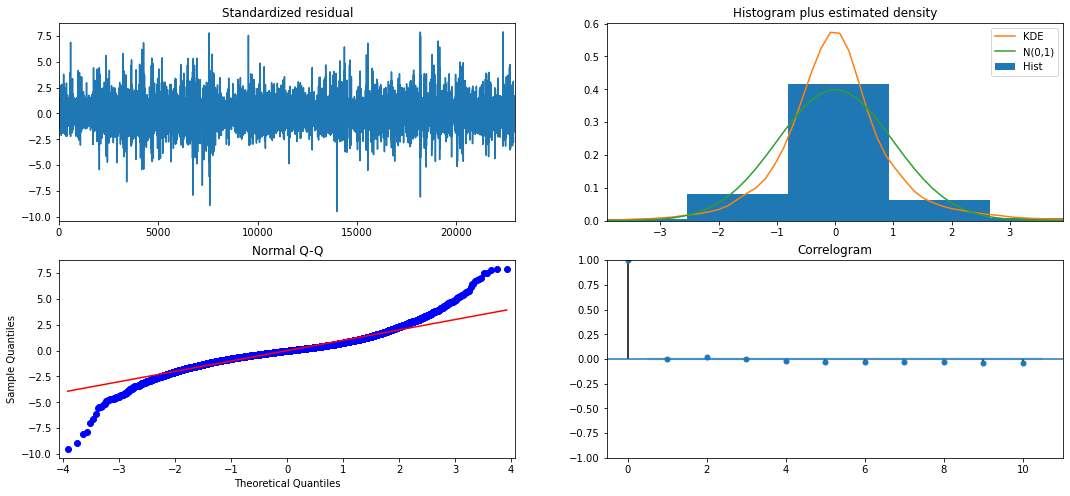

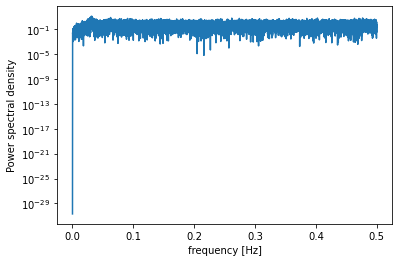

          freq        pow      delay
712   0.030985  12.312824  32.273876
736   0.032029  11.628425  31.221467
718   0.031246   9.894910  32.004178
720   0.031333   9.618714  31.915278
719   0.031289   8.828959  31.959666
717   0.031202   7.850400  32.048815
666   0.028983   7.774041  34.503003
1438  0.062579   7.658224  15.979833
716   0.031159   7.557591  32.093575
728   0.031681   7.494490  31.564560
                                      SARIMAX Results                                       
Dep. Variable:                                   ts   No. Observations:                22979
Model:             SARIMAX(1, 1, 0)x(1, 0, [1], 32)   Log Likelihood              -21046.115
Date:                              Fri, 07 Aug 2020   AIC                          42106.230
Time:                                      19:55:05   BIC                          42162.526
Sample:                                           0   HQIC                         42124.525
                                   

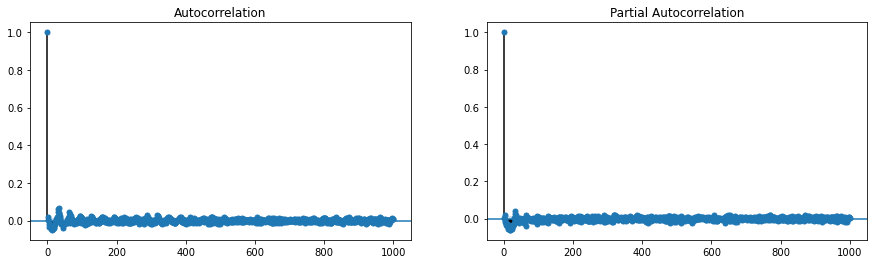

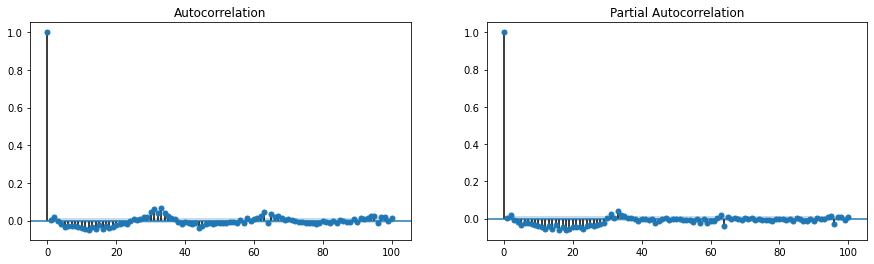

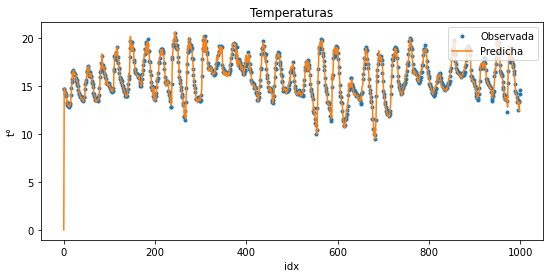

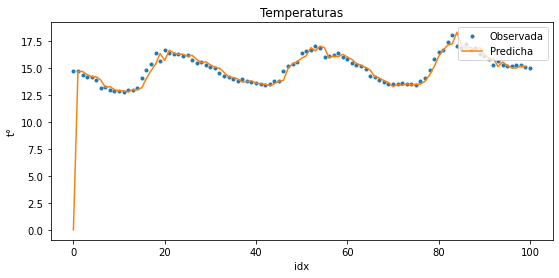

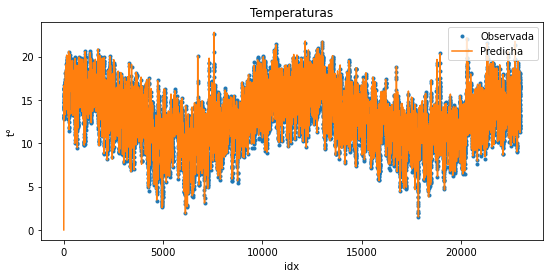

In [23]:
mysarimax(Y=Matriz_Resultados['ts'],
         order=(1,1,0),
         seasonal_order=(1,0,1,60*24/Intervalo),
         Matriz=IG.loc[:,['rr6Horas', 'rr24Horas']])

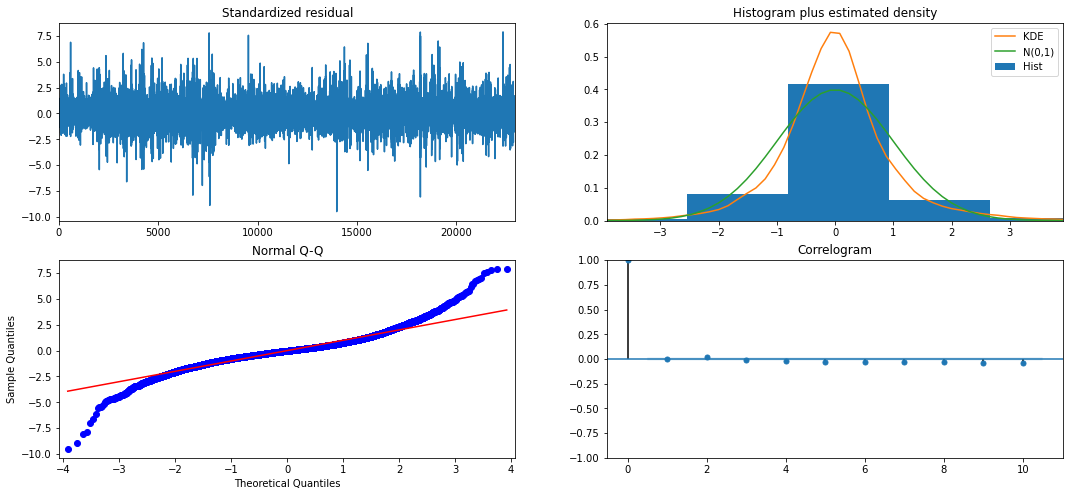

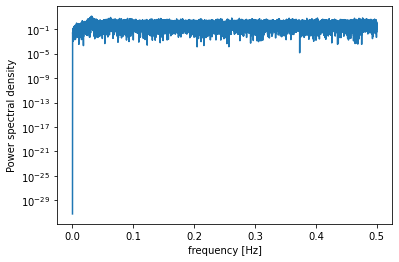

          freq        pow      delay
712   0.030985  12.296117  32.273876
736   0.032029  11.633830  31.221467
718   0.031246   9.904994  32.004178
720   0.031333   9.639778  31.915278
719   0.031289   8.823424  31.959666
717   0.031202   7.847951  32.048815
666   0.028983   7.796899  34.503003
1438  0.062579   7.657867  15.979833
716   0.031159   7.570212  32.093575
728   0.031681   7.461434  31.564560
                                      SARIMAX Results                                       
Dep. Variable:                                   ts   No. Observations:                22979
Model:             SARIMAX(1, 1, 0)x(1, 0, [1], 32)   Log Likelihood              -21044.111
Date:                              Fri, 07 Aug 2020   AIC                          42100.222
Time:                                      20:03:22   BIC                          42148.476
Sample:                                           0   HQIC                         42115.904
                                   

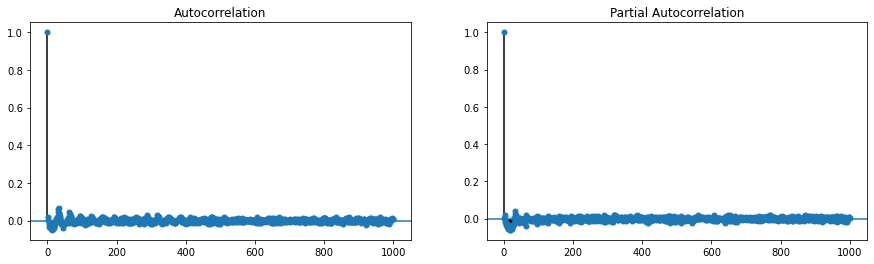

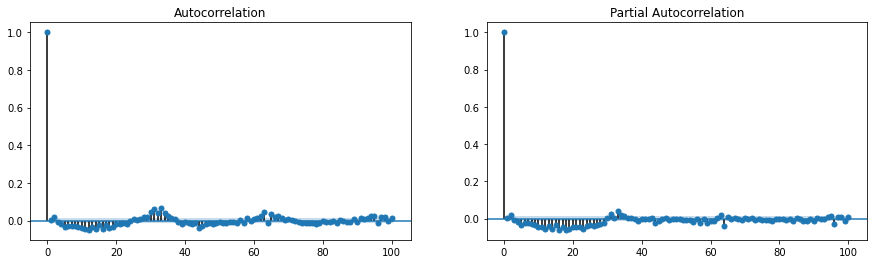

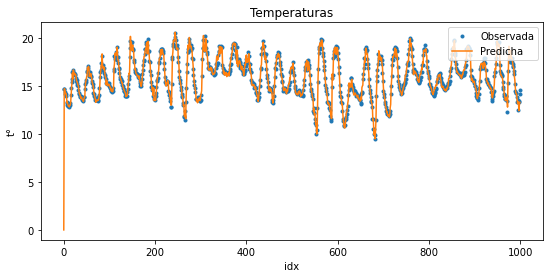

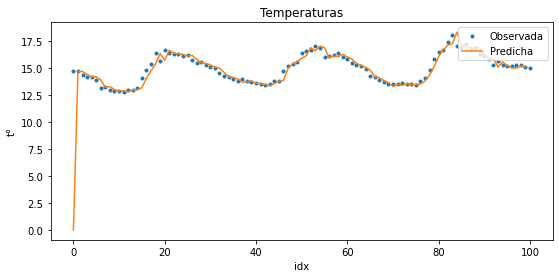

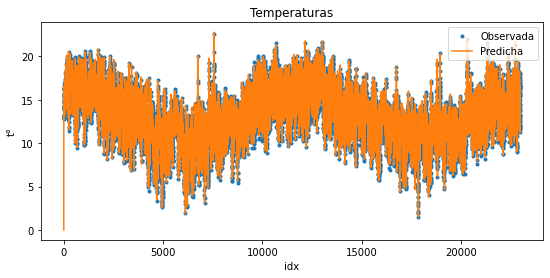

In [24]:
mysarimax(Y=Matriz_Resultados['ts'],
         order=(1,1,0),
         seasonal_order=(1,0,1,60*24/Intervalo),
         Matriz=IG.loc[:,['radiacionGlobalAcumulada24Horas']])

/home/matias/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


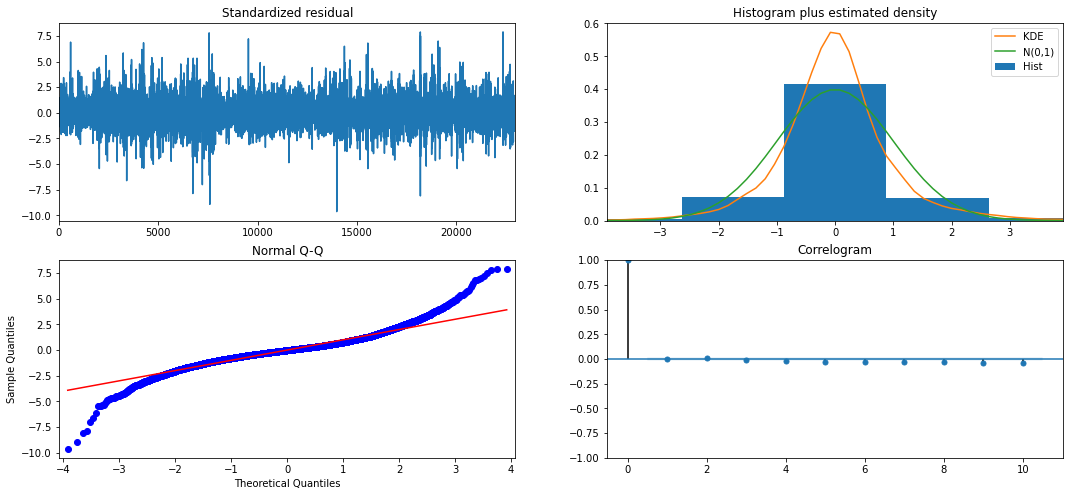

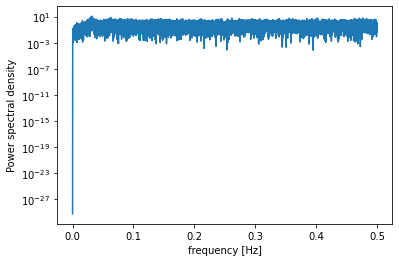

          freq        pow      delay
712   0.030985  11.843549  32.273876
736   0.032029  10.901521  31.221467
718   0.031246   9.274845  32.004178
720   0.031333   9.088836  31.915278
719   0.031289   8.538808  31.959666
1438  0.062579   8.188405  15.979833
717   0.031202   7.596266  32.048815
721   0.031376   7.514304  31.871012
728   0.031681   7.235174  31.564560
705   0.030680   6.999181  32.594326
                                      SARIMAX Results                                       
Dep. Variable:                                   ts   No. Observations:                22979
Model:             SARIMAX(1, 1, 0)x(1, 0, [1], 32)   Log Likelihood              -20964.783
Date:                              Fri, 07 Aug 2020   AIC                          41943.567
Time:                                      20:13:05   BIC                          41999.863
Sample:                                           0   HQIC                         41961.862
                                   

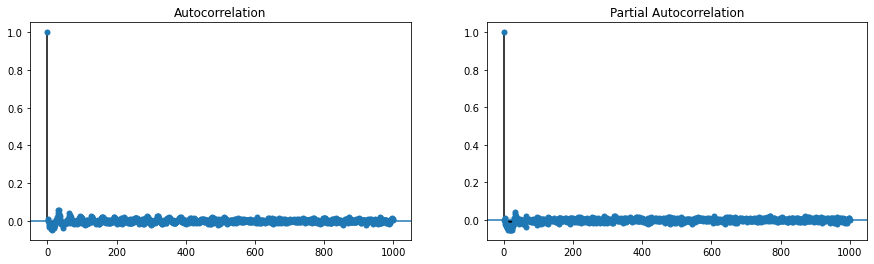

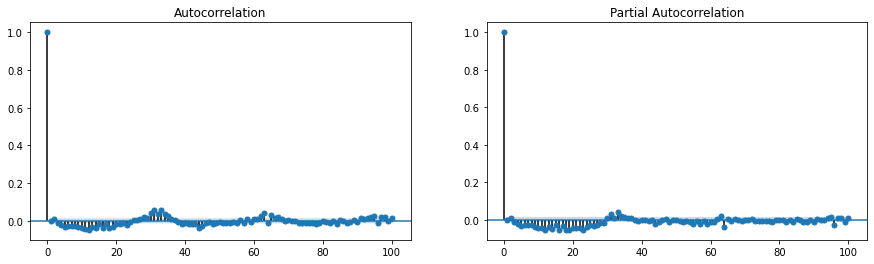

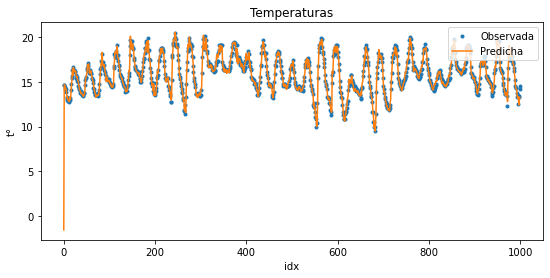

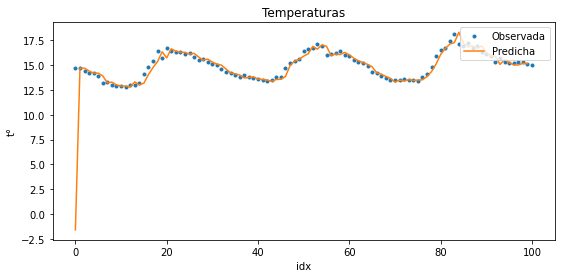

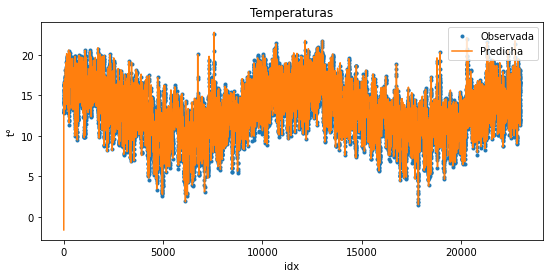

In [25]:
mysarimax(Y=Matriz_Resultados['ts'],
         order=(1,1,0),
         seasonal_order=(1,0,1,60*24/Intervalo),
         Matriz=IG.loc[:,['tMin12Horas', 'tMax12Horas']])

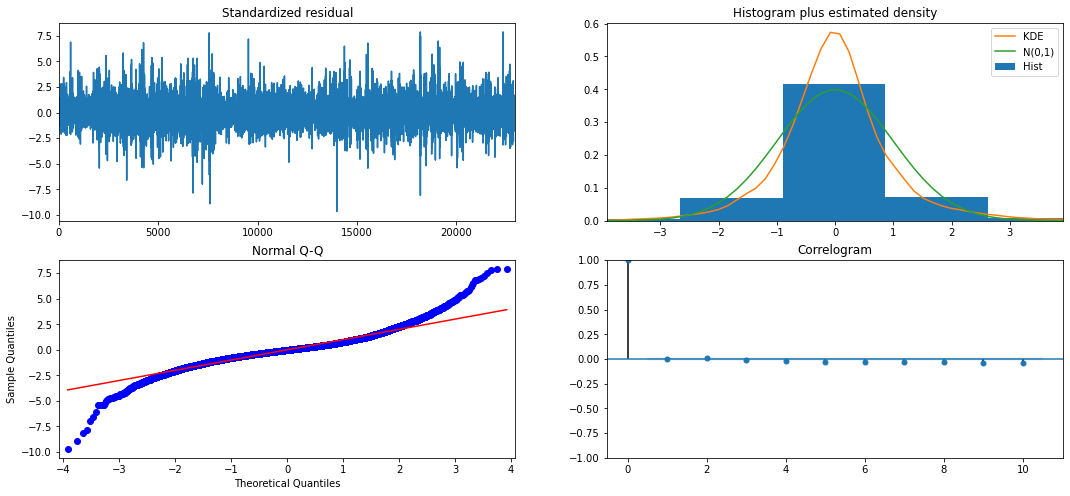

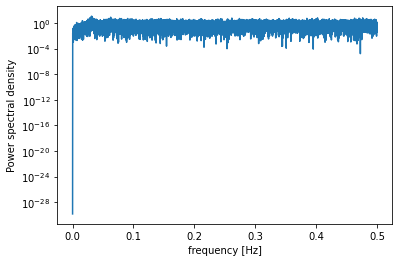

          freq        pow      delay
712   0.030985  11.683794  32.273876
736   0.032029  10.797956  31.221467
718   0.031246   9.253771  32.004178
720   0.031333   8.996926  31.915278
719   0.031289   8.462100  31.959666
1438  0.062579   8.232505  15.979833
717   0.031202   7.529021  32.048815
721   0.031376   7.415658  31.871012
728   0.031681   7.163015  31.564560
666   0.028983   6.977263  34.503003
                                      SARIMAX Results                                       
Dep. Variable:                                   ts   No. Observations:                22979
Model:             SARIMAX(1, 1, 0)x(1, 0, [1], 32)   Log Likelihood              -20966.032
Date:                              Fri, 07 Aug 2020   AIC                          41944.065
Time:                                      20:30:28   BIC                          41992.318
Sample:                                           0   HQIC                         41959.746
                                   

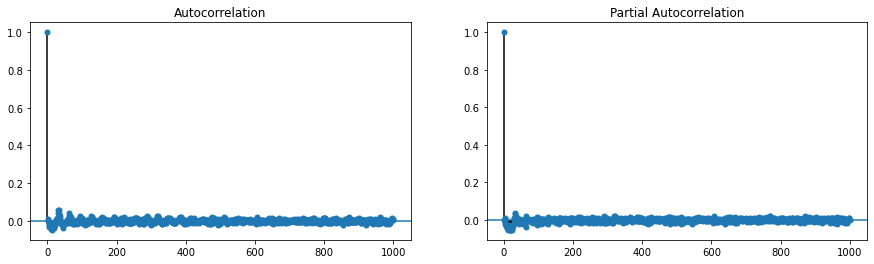

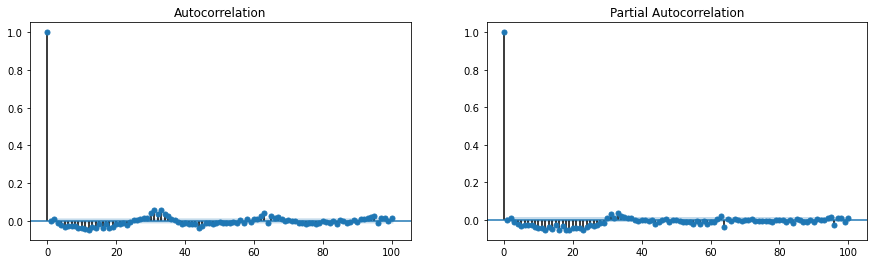

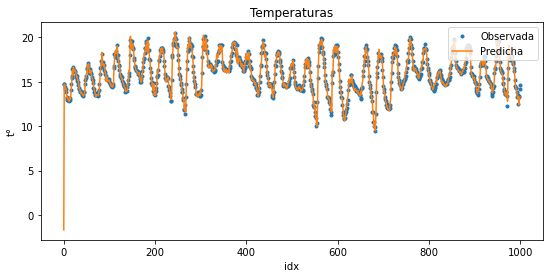

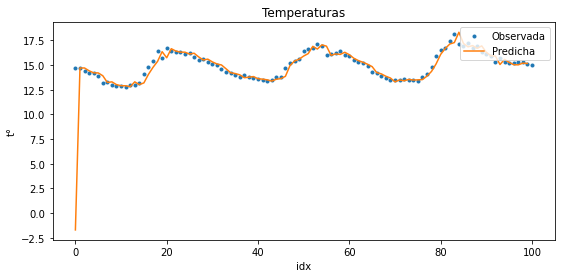

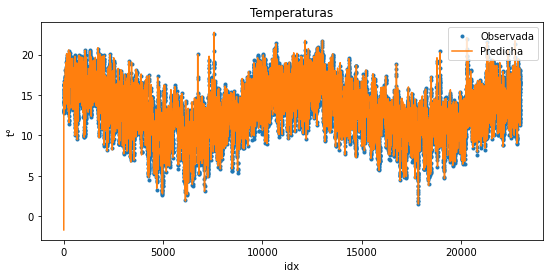

In [27]:
mysarimax(Y=Matriz_Resultados['ts'],
         order=(1,1,0),
         seasonal_order=(1,0,1,60*24/Intervalo),
         Matriz=IG.loc[:,['tMin12Horas']])

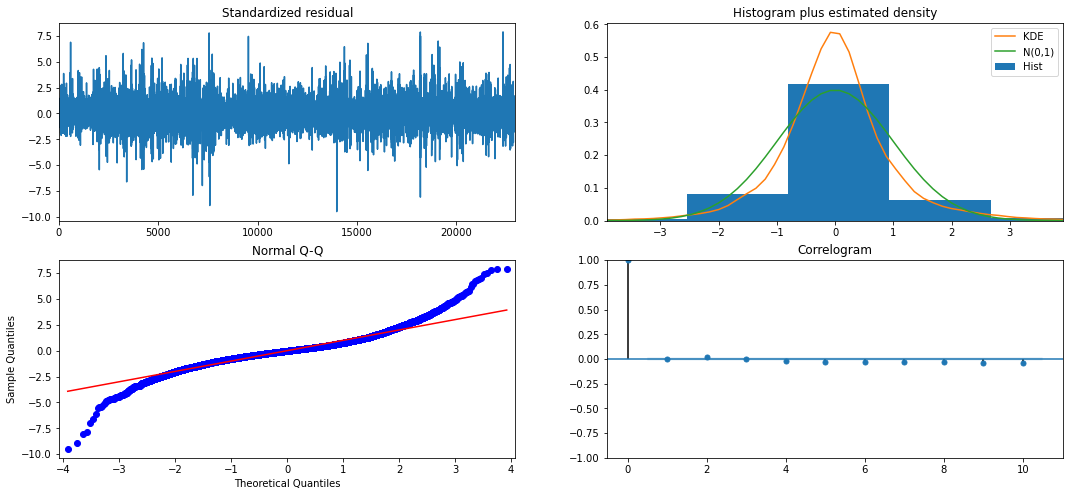

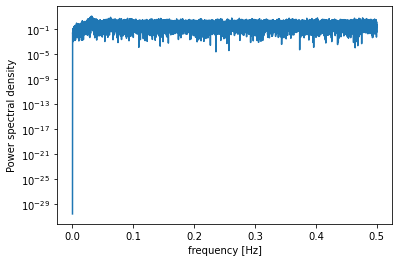

          freq        pow      delay
712   0.030985  11.806437  32.273876
736   0.032029  11.364285  31.221467
718   0.031246   9.829315  32.004178
720   0.031333   9.485684  31.915278
719   0.031289   8.603522  31.959666
1438  0.062579   7.917671  15.979833
666   0.028983   7.782433  34.503003
717   0.031202   7.670985  32.048815
716   0.031159   7.429711  32.093575
728   0.031681   7.263914  31.564560
                                      SARIMAX Results                                       
Dep. Variable:                                   ts   No. Observations:                22979
Model:             SARIMAX(1, 1, 0)x(1, 0, [1], 32)   Log Likelihood              -21039.054
Date:                              Fri, 07 Aug 2020   AIC                          42092.107
Time:                                      20:22:19   BIC                          42148.403
Sample:                                           0   HQIC                         42110.403
                                   

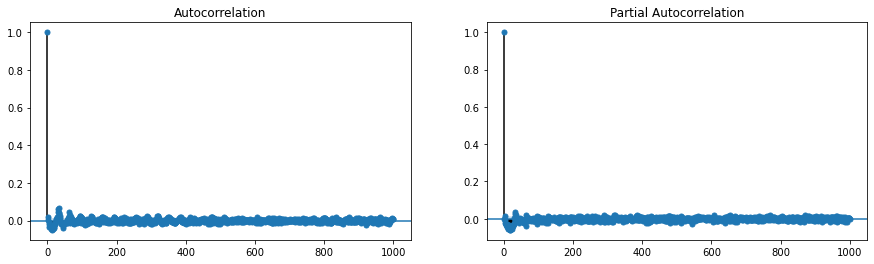

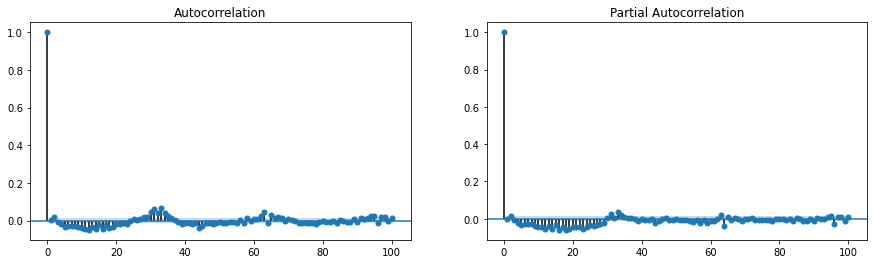

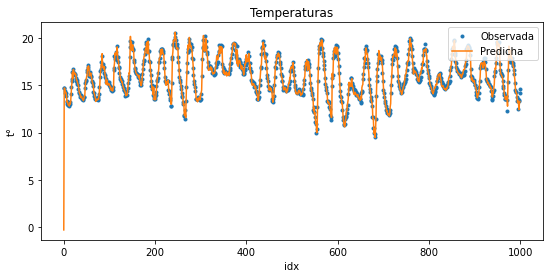

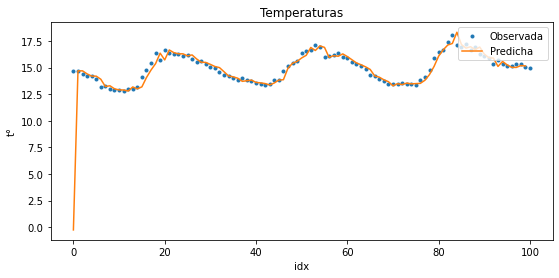

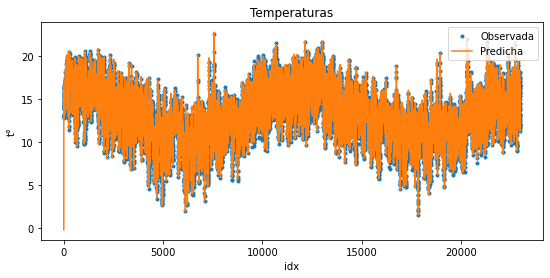

In [26]:
mysarimax(Y=Matriz_Resultados['ts'],
         order=(1,1,0),
         seasonal_order=(1,0,1,60*24/Intervalo),
         Matriz=IG.loc[:,['Hora_Min_t', 'Hora_Max_t']])

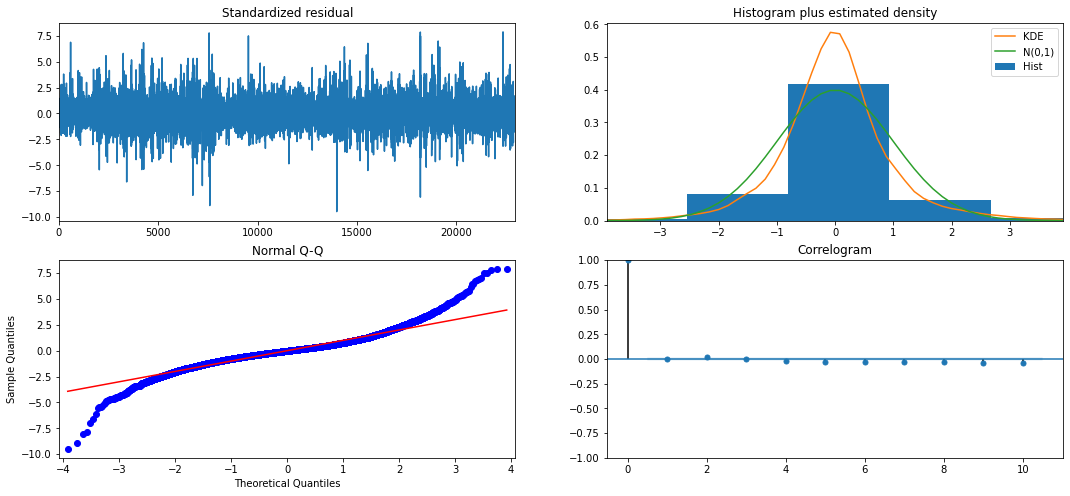

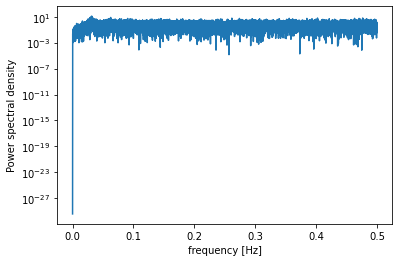

          freq        pow      delay
712   0.030985  12.077891  32.273876
736   0.032029  11.535860  31.221467
718   0.031246   9.833438  32.004178
720   0.031333   9.582327  31.915278
719   0.031289   8.722782  31.959666
1438  0.062579   7.794996  15.979833
717   0.031202   7.782626  32.048815
666   0.028983   7.765530  34.503003
716   0.031159   7.494171  32.093575
728   0.031681   7.451927  31.564560
                                      SARIMAX Results                                       
Dep. Variable:                                   ts   No. Observations:                22979
Model:             SARIMAX(1, 1, 0)x(1, 0, [1], 32)   Log Likelihood              -21041.568
Date:                              Fri, 07 Aug 2020   AIC                          42095.137
Time:                                      21:20:43   BIC                          42143.391
Sample:                                           0   HQIC                         42110.818
                                   

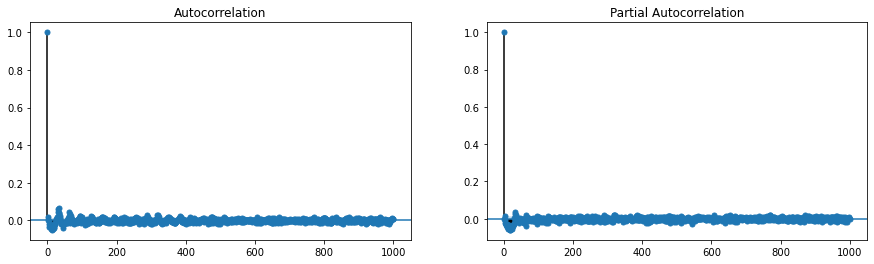

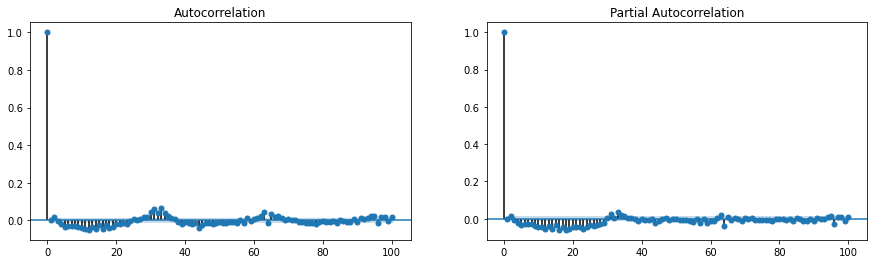

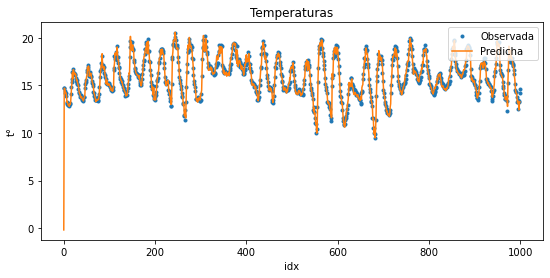

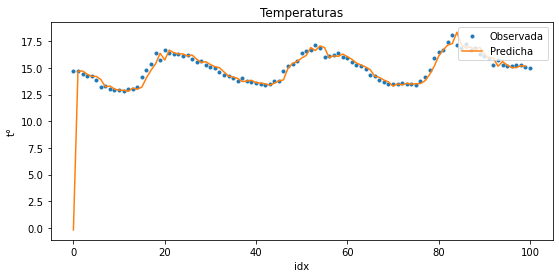

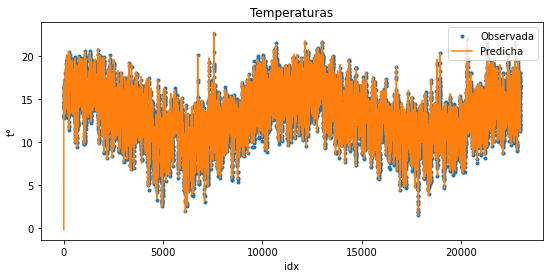

In [30]:
mysarimax(Y=Matriz_Resultados['ts'],
         order=(1,1,0),
         seasonal_order=(1,0,1,60*24/Intervalo),
         Matriz=IG.loc[:,['Hora_Min_t']])

Model: SARIMAX(1, 1, 0)x(1, 0, [1], 32)    AIC: 42105.668  
Agregando Mes:                             AIC: 42113.404  => No significativos X
Agregando Hora:                            AIC: 42057.301 Convergencia  
Agregando RR:                              AIC: 42106.230  => No significativos X
Agregando radiacionGlobalAcumulada24Horas: AIC: 42100.222  
Agregando tminmax:                         AIC: 41943.567 Convergencia, tmax no sign => Quitar tmax: 41944.065  
Agregando Htminmax:                        AIC: 42092.107  => Hmaxt no sign => Quitar: 42095.137

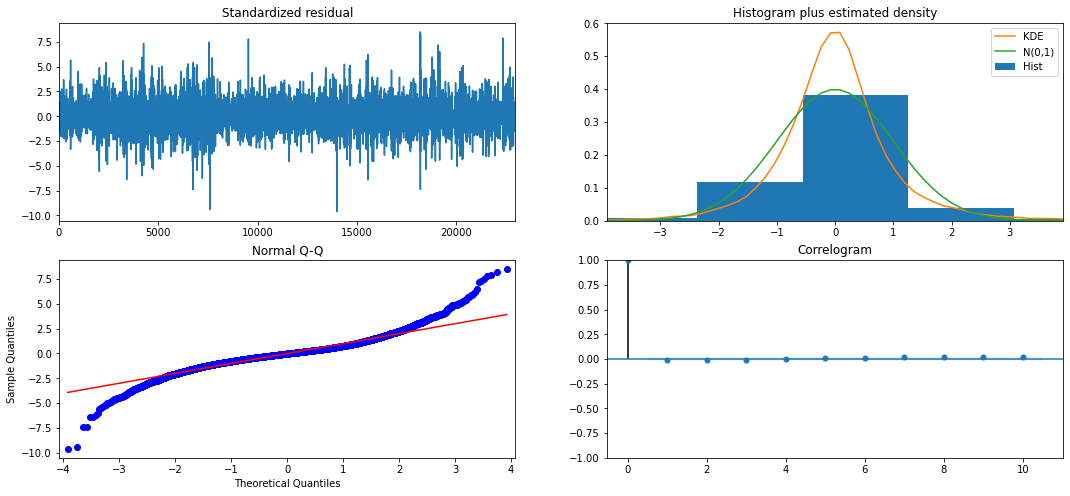

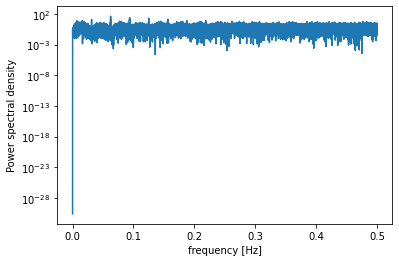

          freq        pow      delay
1436  0.062492  40.700368  16.002089
2154  0.093738  22.785477  10.668059
1438  0.062579  21.293153  15.979833
2875  0.125114  19.361970   7.992696
2873  0.125027  14.357687   7.998260
3594  0.156404  13.303135   6.393712
2157  0.093868  12.961158  10.653222
718   0.031246  12.377930  32.004178
2151  0.093607  11.855477  10.682938
1439  0.062622  10.862324  15.968728
                               SARIMAX Results                                
Dep. Variable:                     ts   No. Observations:                22979
Model:              SARIMAX(32, 1, 0)   Log Likelihood              -20941.886
Date:                Sat, 08 Aug 2020   AIC                          41951.772
Time:                        11:50:32   BIC                          42225.210
Sample:                             0   HQIC                         42040.635
                              - 22979                                         
Covariance Type:                  opg   

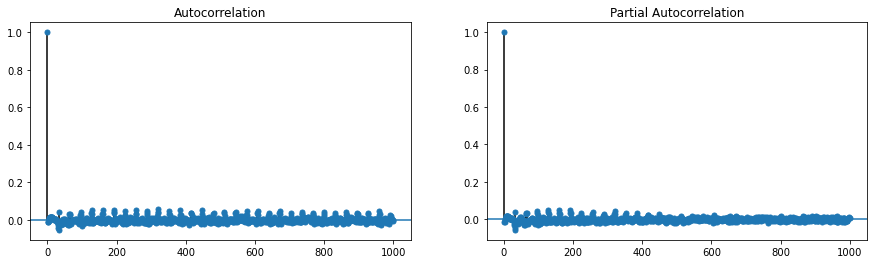

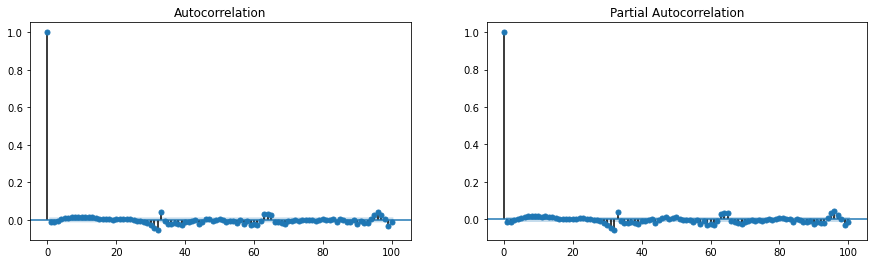

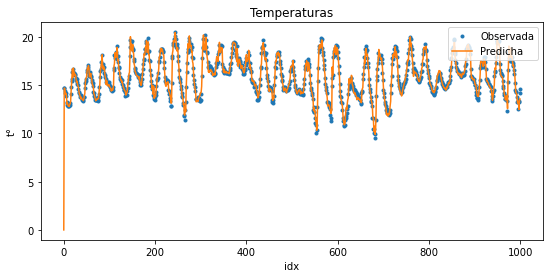

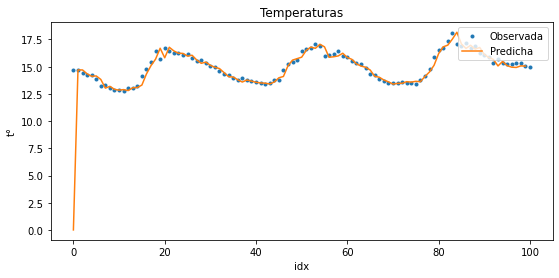

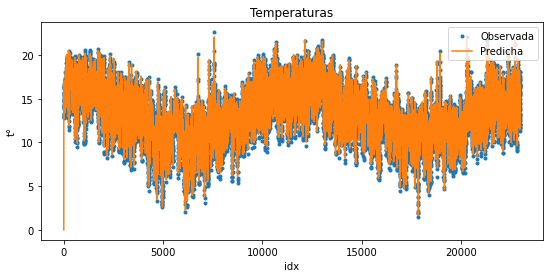

In [45]:
mysarima(Y=Matriz_Resultados['ts'],
         order=(60*24/Intervalo,1,0))

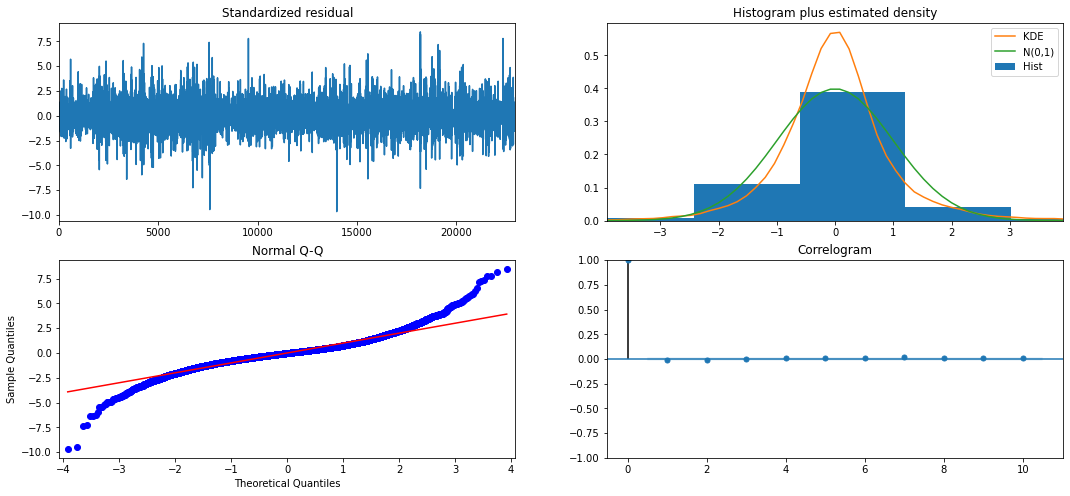

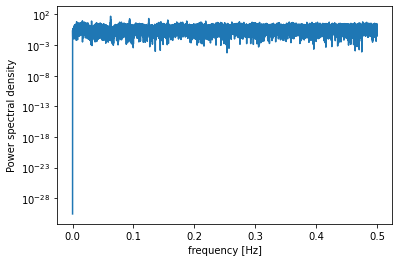

          freq        pow      delay
1436  0.062492  51.142290  16.002089
1438  0.062579  27.016940  15.979833
2875  0.125114  21.837233   7.992696
2154  0.093738  19.414251  10.668059
2873  0.125027  16.102997   7.998260
1439  0.062622  13.653528  15.968728
3594  0.156404  12.317526   6.393712
2874  0.125071  11.214629   7.995477
2157  0.093868  11.130873  10.653222
2151  0.093607  10.213198  10.682938
                                       SARIMAX Results                                       
Dep. Variable:                                    ts   No. Observations:                22979
Model:             SARIMAX(32, 1, 0)x(0, 0, [1], 16)   Log Likelihood              -20933.440
Date:                               Sat, 08 Aug 2020   AIC                          41936.880
Time:                                       12:43:50   BIC                          42218.361
Sample:                                            0   HQIC                         42028.357
                             

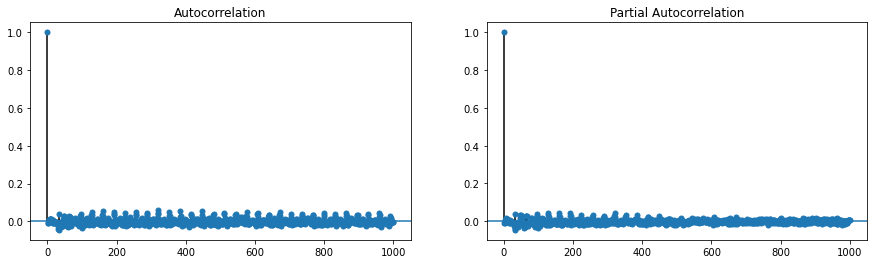

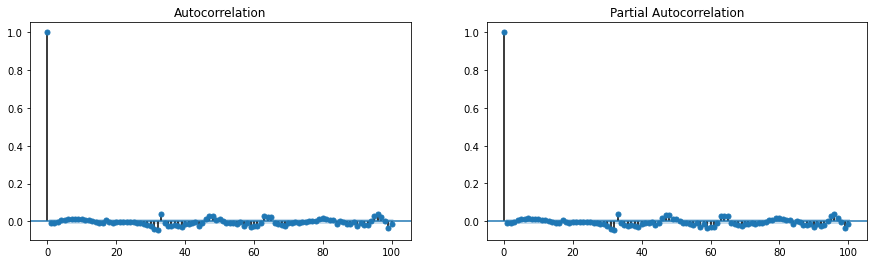

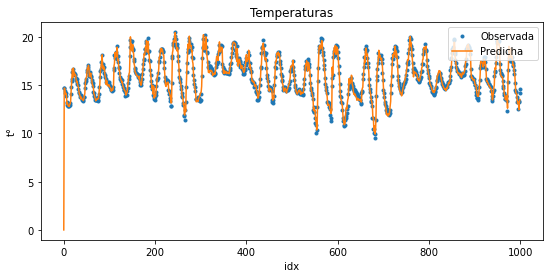

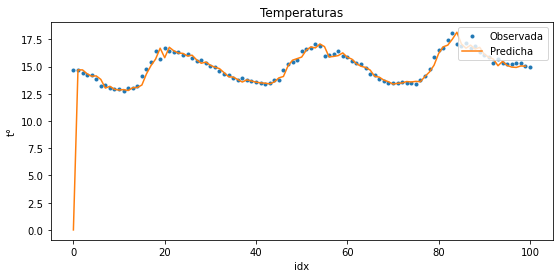

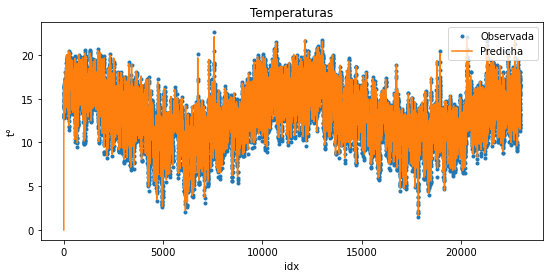

In [48]:
mysarima(Y=Matriz_Resultados['ts'],
         order=(60*24/Intervalo,1,0),
         seasonal_order=(0,0,1,60*12/Intervalo))

/home/matias/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


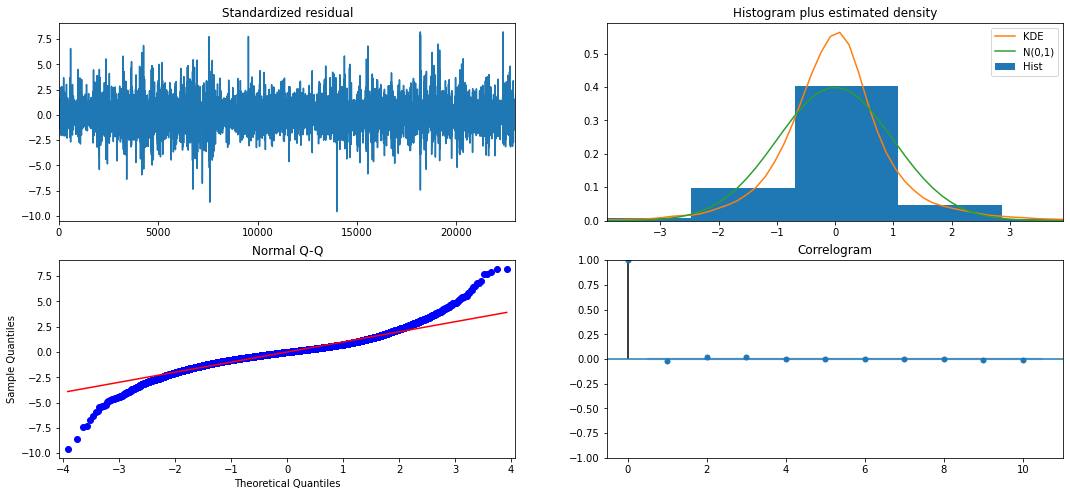

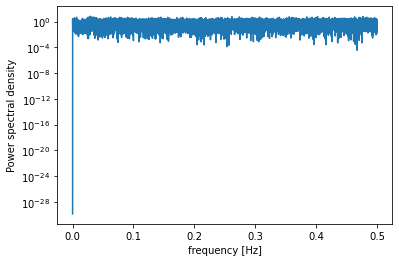

           freq       pow      delay
666    0.028983  6.849115  34.503003
10952  0.476609  6.326105   2.098156
9246   0.402367  6.132810   2.485291
6013   0.261674  5.758456   3.821553
653    0.028417  5.591280  35.189893
8179   0.355934  5.502434   2.809512
10645  0.463249  5.409358   2.158666
8843   0.384830  5.376348   2.598553
6298   0.274076  5.362806   3.648619
1436   0.062492  5.334625  16.002089
                                       SARIMAX Results                                       
Dep. Variable:                                    ts   No. Observations:                22979
Model:             SARIMAX(32, 1, 0)x(0, 0, [1], 32)   Log Likelihood              -20334.276
Date:                               Sat, 08 Aug 2020   AIC                          40738.552
Time:                                       11:08:54   BIC                          41020.033
Sample:                                            0   HQIC                         40830.029
                             

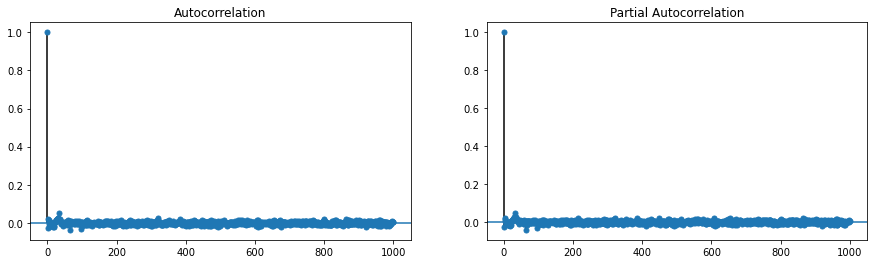

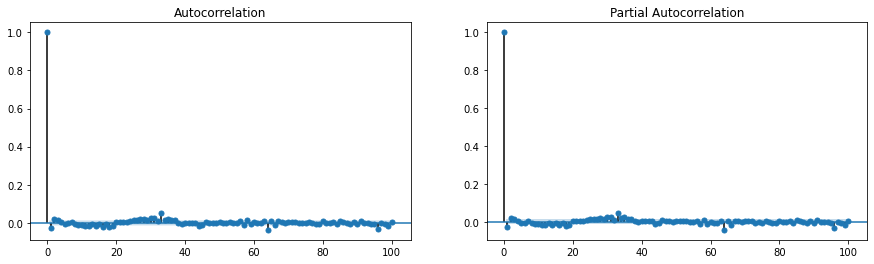

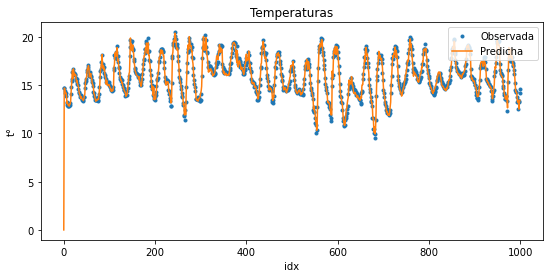

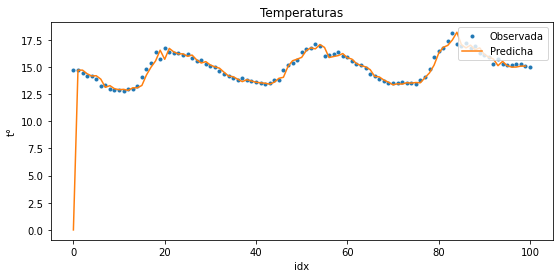

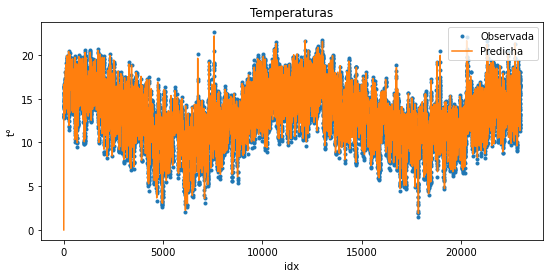

In [44]:
mysarima(Y=Matriz_Resultados['ts'],
         order=(60*24/Intervalo,1,0),
         seasonal_order=(0,0,1,60*24/Intervalo))

/home/matias/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


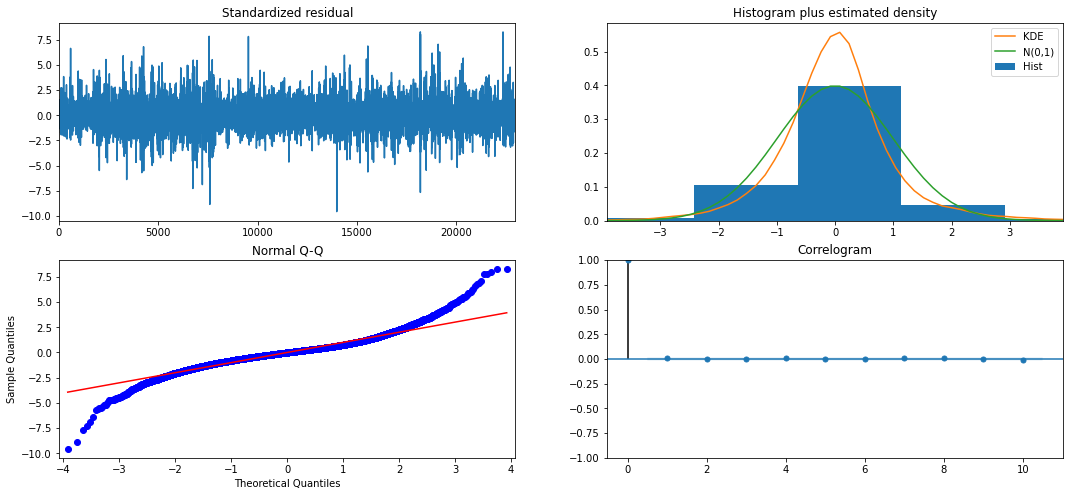

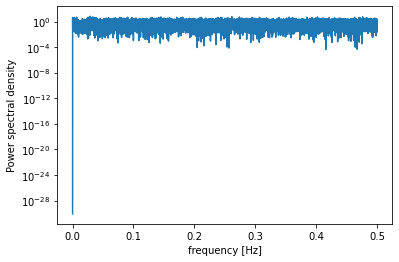

           freq       pow      delay
666    0.028983  6.958581  34.503003
6013   0.261674  5.898719   3.821553
10952  0.476609  5.611373   2.098156
653    0.028417  5.559891  35.189893
9246   0.402367  5.387328   2.485291
3330   0.144915  5.319870   6.900601
6298   0.274076  5.317403   3.648619
773    0.033639  5.075084  29.727038
8179   0.355934  5.055373   2.809512
4155   0.180817  5.028722   5.530445
                                       SARIMAX Results                                       
Dep. Variable:                                    ts   No. Observations:                22979
Model:             SARIMAX(36, 1, 0)x(0, 0, [1], 32)   Log Likelihood              -20276.538
Date:                               Sat, 08 Aug 2020   AIC                          40631.077
Time:                                       13:32:57   BIC                          40944.726
Sample:                                            0   HQIC                         40733.007
                             

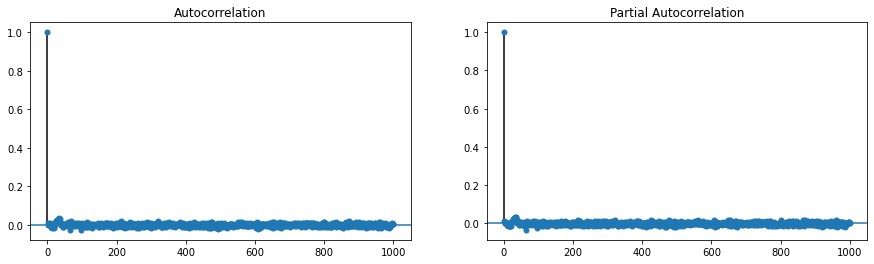

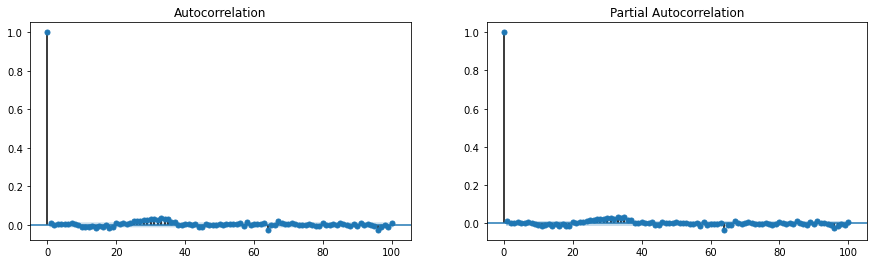

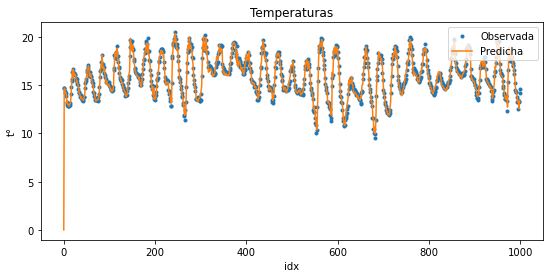

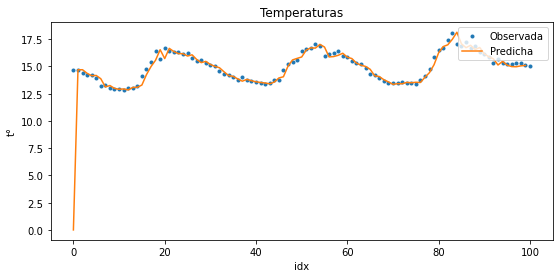

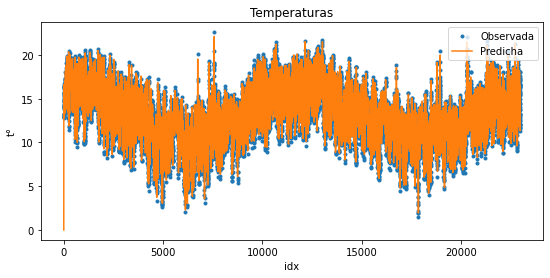

In [49]:
mysarima(Y=Matriz_Resultados['ts'],
         order=(60*27/Intervalo,1,0),
         seasonal_order=(0,0,1,60*24/Intervalo))

Model: SARIMAX(36, 1, 0)x(0, 0, [1], 32)    AIC: 40631.077   
Agregando hora:                             AIC: 41001.589  
Agregando Mes:                              AIC: 40660.599  
Agregando RR:                               AIC: 40651.560  
Agregando radiacionGlobalAcumulada24Horas:  AIC: 41085.822  
Agregando tminmax:                          AIC: 40577.426  
Agregando Htminmax:                         AIC: 40630.086  

/home/matias/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


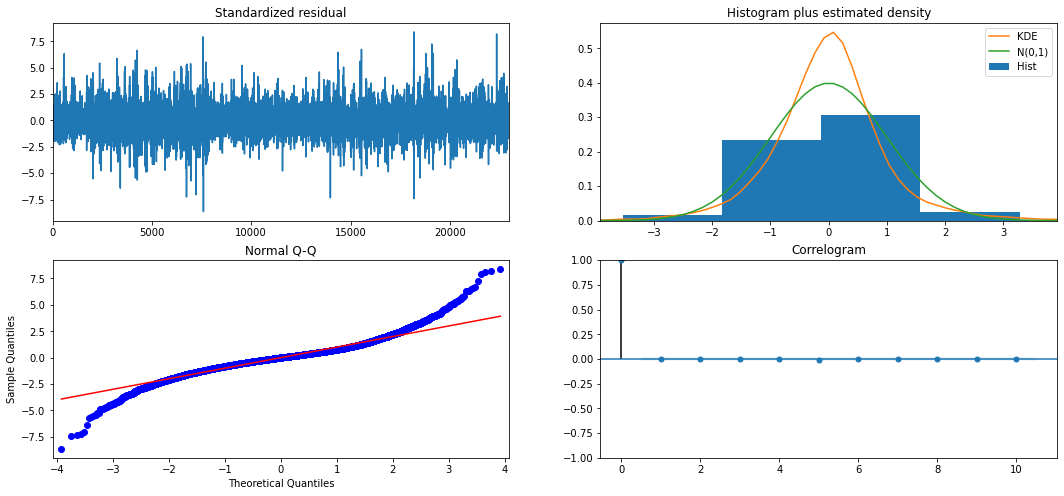

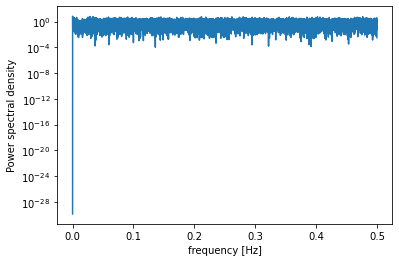

           freq       pow         delay
2      0.000087  6.665025  11489.500000
666    0.028983  6.067251     34.503003
10952  0.476609  5.701093      2.098156
776    0.033770  5.436076     29.612113
9246   0.402367  5.392558      2.485291
6013   0.261674  5.390576      3.821553
6438   0.280169  5.385976      3.569276
4865   0.211715  5.382658      4.723330
8179   0.355934  5.371479      2.809512
3330   0.144915  5.094352      6.900601
                                       SARIMAX Results                                       
Dep. Variable:                                    ts   No. Observations:                22979
Model:             SARIMAX(36, 1, 0)x(0, 0, [1], 32)   Log Likelihood              -20438.794
Date:                               Sat, 08 Aug 2020   AIC                          41001.589
Time:                                       18:25:56   BIC                          41500.211
Sample:                                            0   HQIC                         41163.

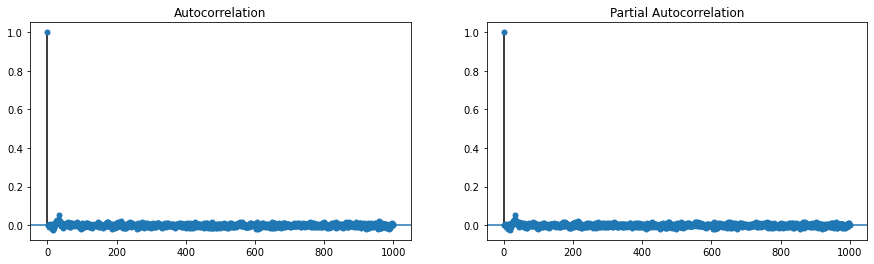

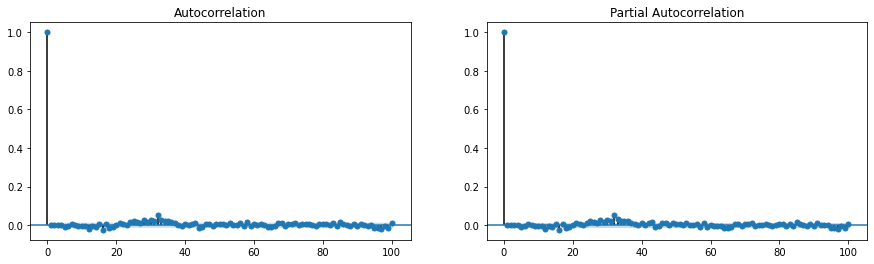

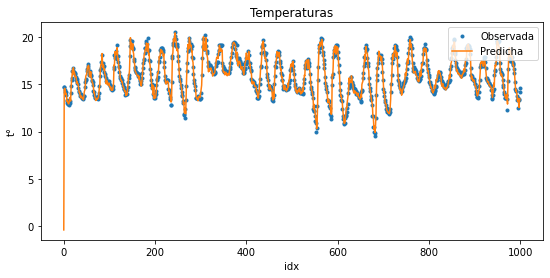

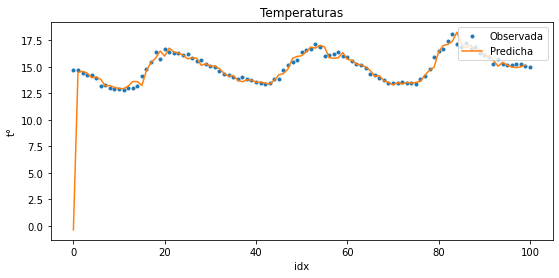

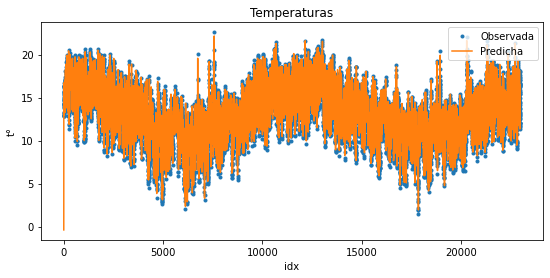

In [55]:
mysarimax(Y=Matriz_Resultados['ts'],
         order=(60*27/Intervalo,1,0),
         seasonal_order=(0,0,1,60*24/Intervalo),
         Matriz=IG.loc[:,['H1','H2','H3','H4','H5','H6','H7','H8',
                           'H9','H10','H11','H12','H13','H14','H15',
                           'H16','H17','H18','H19','H20','H21','H22','H23']])

/home/matias/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


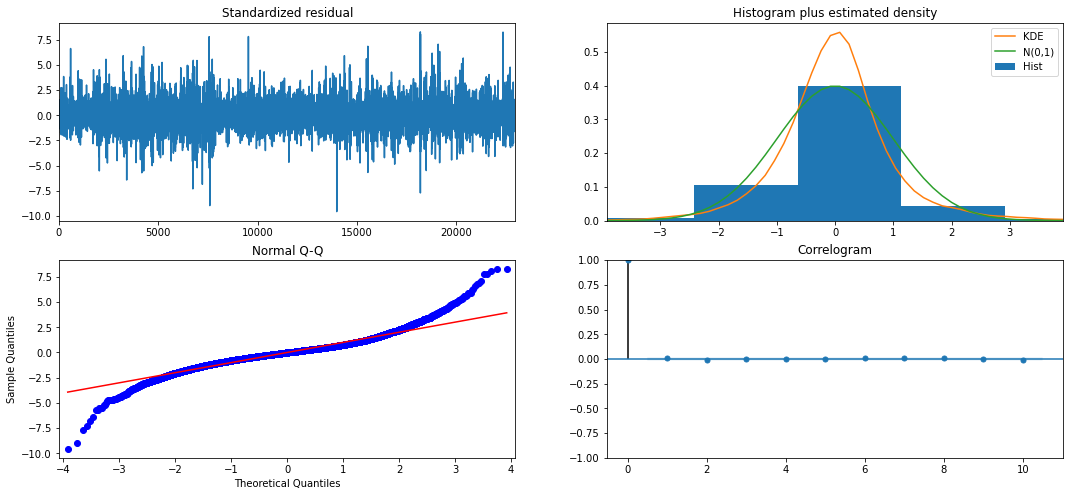

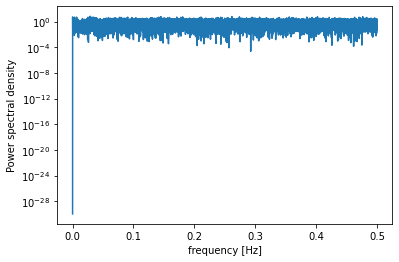

           freq       pow         delay
666    0.028983  6.631930     34.503003
6013   0.261674  6.004296      3.821553
9246   0.402367  5.544932      2.485291
10952  0.476609  5.498075      2.098156
3330   0.144915  5.427297      6.900601
6298   0.274076  5.292943      3.648619
4155   0.180817  5.267002      5.530445
653    0.028417  5.186432     35.189893
2      0.000087  5.170571  11489.500000
8179   0.355934  5.164315      2.809512
                                       SARIMAX Results                                       
Dep. Variable:                                    ts   No. Observations:                22979
Model:             SARIMAX(36, 1, 0)x(0, 0, [1], 32)   Log Likelihood              -20280.299
Date:                               Sat, 08 Aug 2020   AIC                          40660.599
Time:                                       20:46:06   BIC                          41062.714
Sample:                                            0   HQIC                         40791.

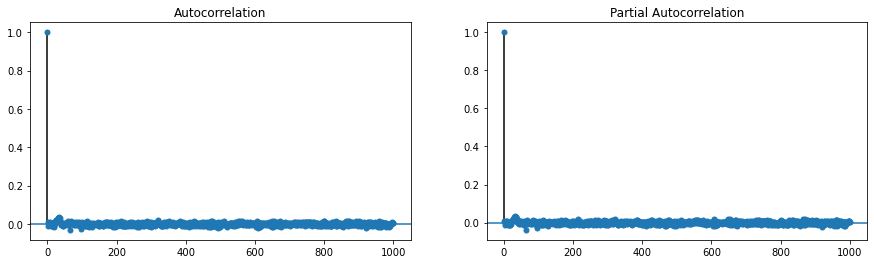

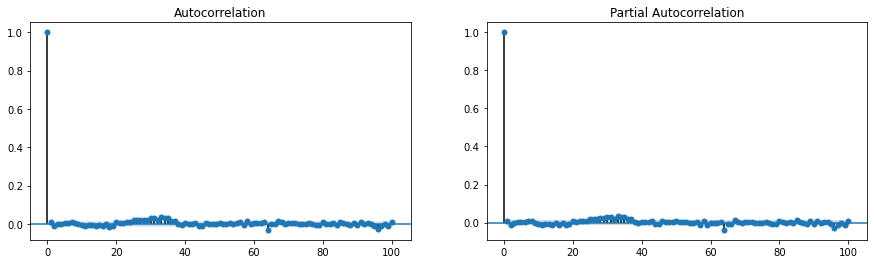

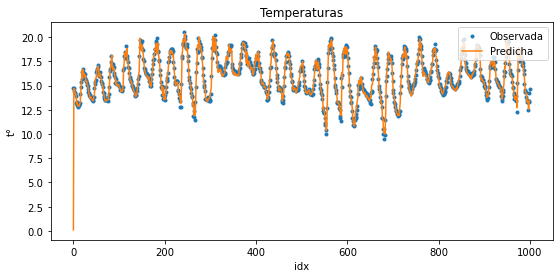

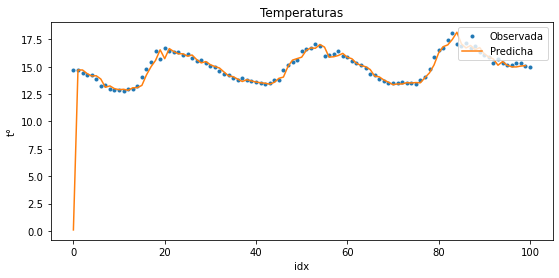

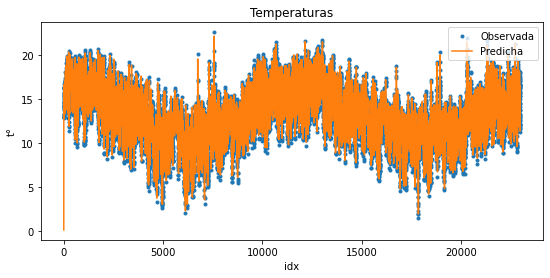

In [57]:
mysarimax(Y=Matriz_Resultados['ts'],
         order=(60*27/Intervalo,1,0),
         seasonal_order=(0,0,1,60*24/Intervalo),
         Matriz=IG.loc[:,['M1','M2','M3','M4','M5','M6','M7','M8','M9','M10','M11']])

/home/matias/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


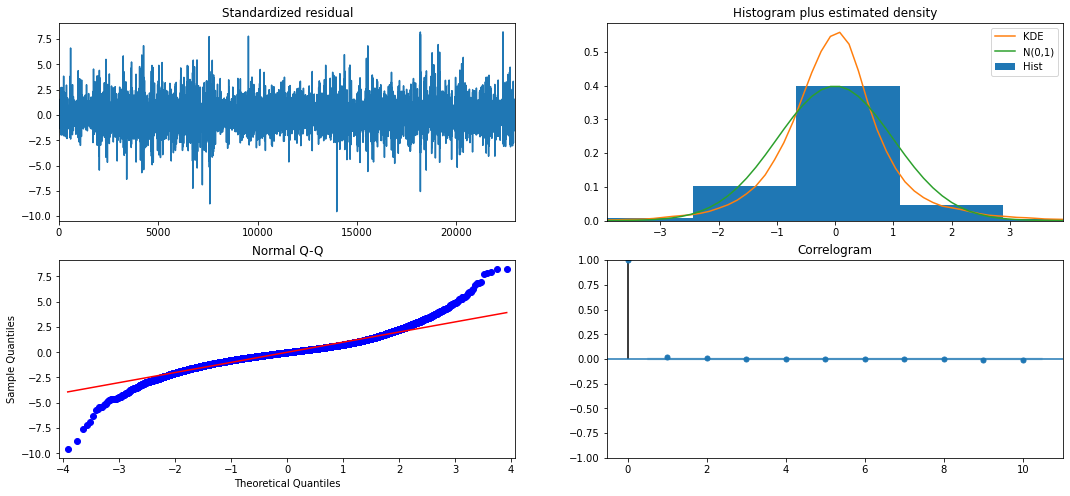

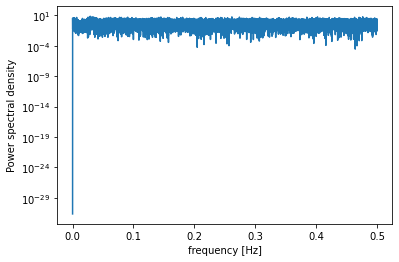

           freq       pow      delay
666    0.028983  7.149448  34.503003
653    0.028417  5.817193  35.189893
10952  0.476609  5.692594   2.098156
6013   0.261674  5.582061   3.821553
9246   0.402367  5.538908   2.485291
773    0.033639  5.328540  29.727038
3330   0.144915  5.273355   6.900601
6298   0.274076  5.147133   3.648619
736    0.032029  5.141004  31.221467
8179   0.355934  5.022888   2.809512
                                       SARIMAX Results                                       
Dep. Variable:                                    ts   No. Observations:                22979
Model:             SARIMAX(36, 1, 0)x(0, 0, [1], 32)   Log Likelihood              -20284.780
Date:                               Sat, 08 Aug 2020   AIC                          40651.560
Time:                                       21:34:29   BIC                          40981.294
Sample:                                            0   HQIC                         40758.718
                             

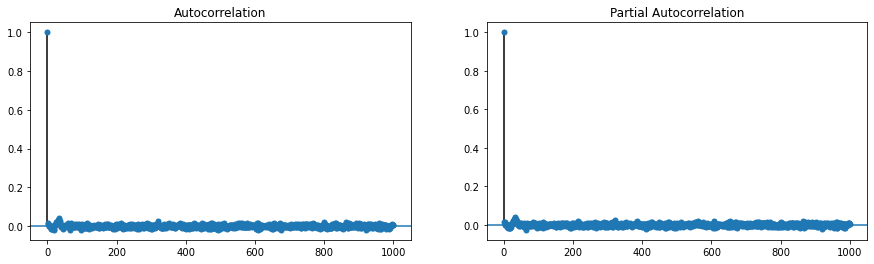

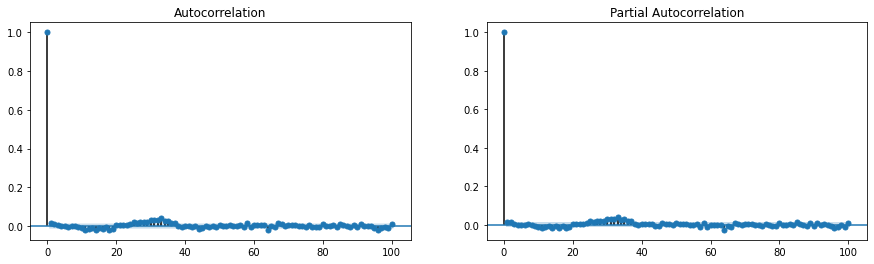

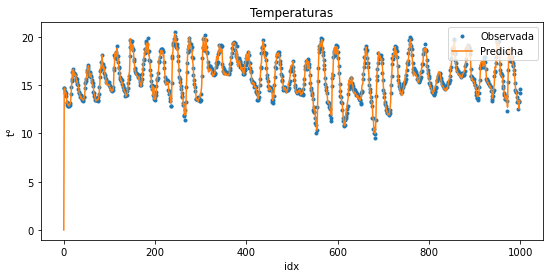

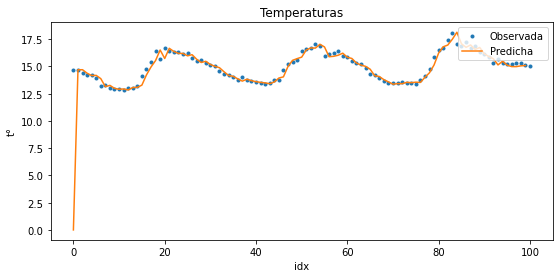

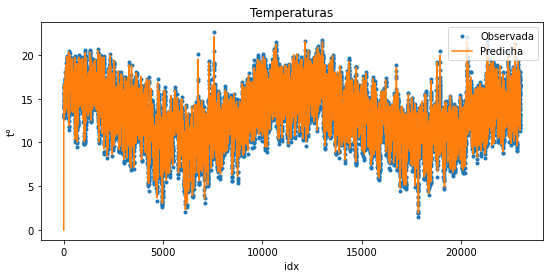

In [58]:
mysarimax(Y=Matriz_Resultados['ts'],
         order=(60*27/Intervalo,1,0),
         seasonal_order=(0,0,1,60*24/Intervalo),
         Matriz=IG.loc[:,['rr6Horas', 'rr24Horas']])

/home/matias/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


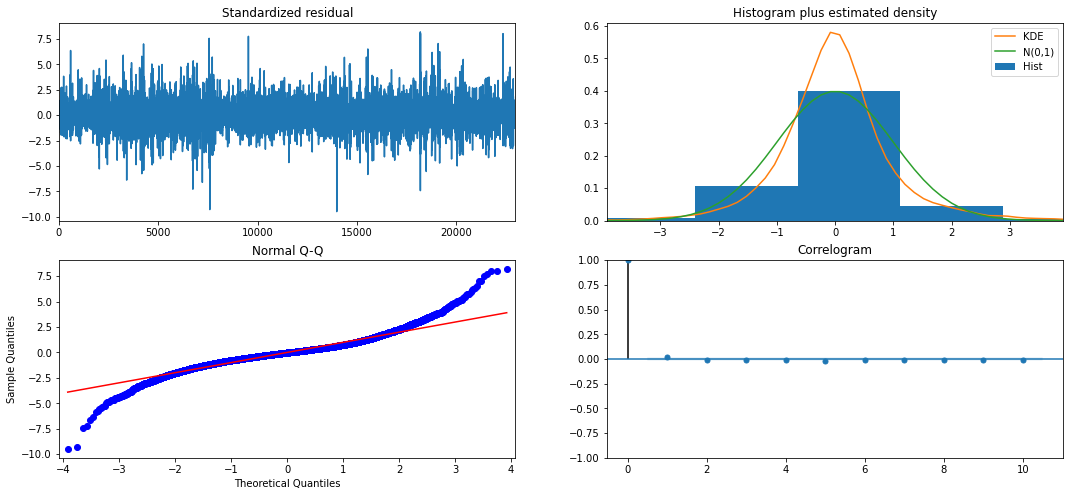

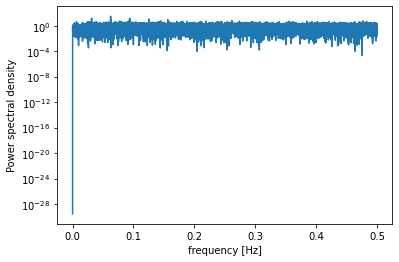

          freq        pow      delay
1436  0.062492  31.383415  16.002089
1438  0.062579  15.975522  15.979833
718   0.031246  15.909508  32.004178
2154  0.093738  15.454707  10.668059
2875  0.125114  11.528309   7.992696
3594  0.156404   9.179376   6.393712
717   0.031202   9.119553  32.048815
2157  0.093868   8.874648  10.653222
2873  0.125027   8.735423   7.998260
719   0.031289   8.529343  31.959666
                                       SARIMAX Results                                       
Dep. Variable:                                    ts   No. Observations:                22979
Model:             SARIMAX(36, 1, 0)x(0, 0, [1], 32)   Log Likelihood              -20502.911
Date:                               Sat, 08 Aug 2020   AIC                          41085.822
Time:                                       22:24:04   BIC                          41407.513
Sample:                                            0   HQIC                         41190.366
                             

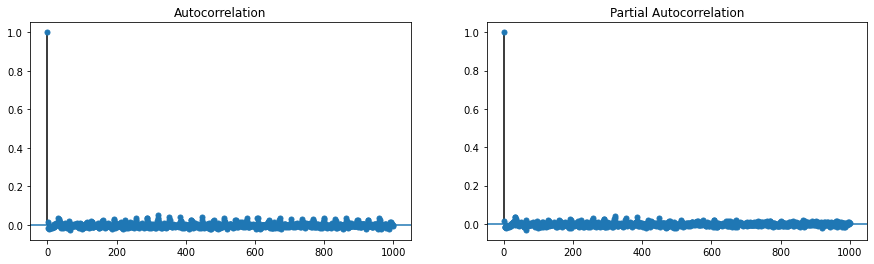

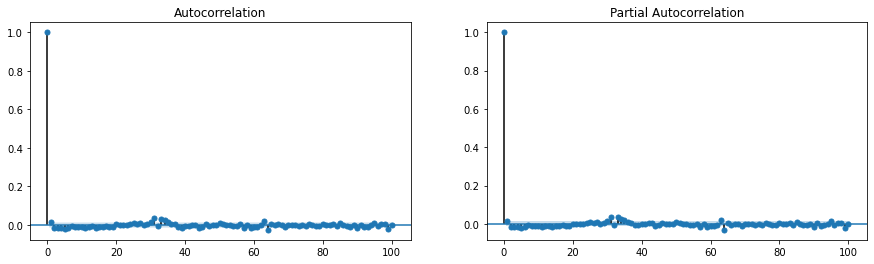

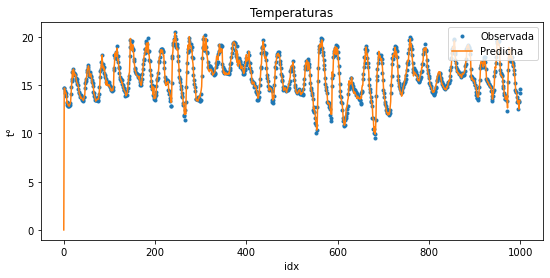

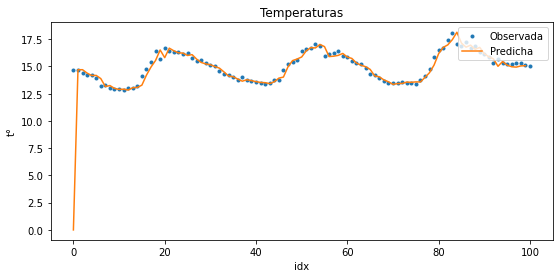

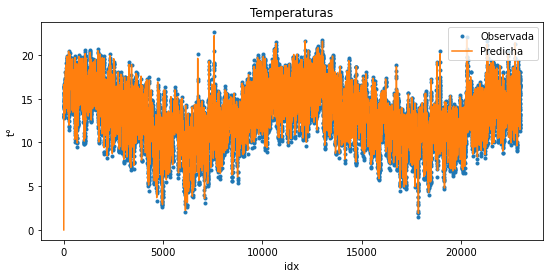

In [59]:
mysarimax(Y=Matriz_Resultados['ts'],
         order=(60*27/Intervalo,1,0),
         seasonal_order=(0,0,1,60*24/Intervalo),
         Matriz=IG.loc[:,['radiacionGlobalAcumulada24Horas']])

/home/matias/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


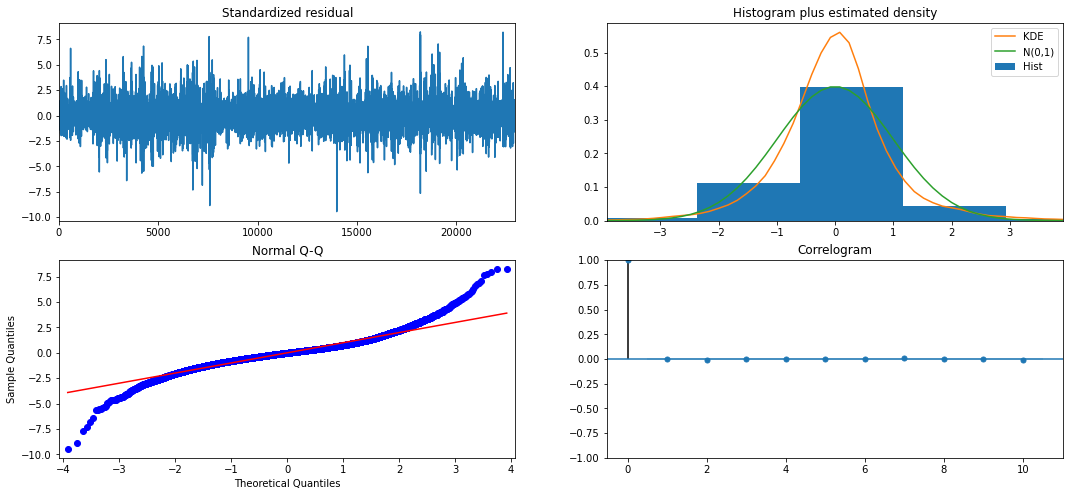

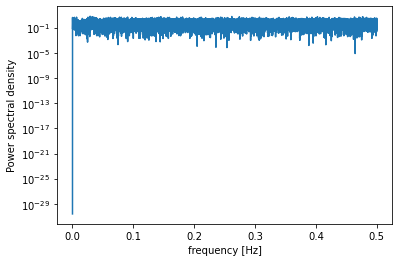

           freq       pow      delay
666    0.028983  6.465671  34.503003
6013   0.261674  5.871202   3.821553
10952  0.476609  5.532723   2.098156
9246   0.402367  5.457419   2.485291
6298   0.274076  5.266668   3.648619
736    0.032029  5.234610  31.221467
3330   0.144915  5.205309   6.900601
8179   0.355934  5.186046   2.809512
653    0.028417  5.107784  35.189893
10645  0.463249  5.007285   2.158666
                                       SARIMAX Results                                       
Dep. Variable:                                    ts   No. Observations:                22979
Model:             SARIMAX(36, 1, 0)x(0, 0, [1], 32)   Log Likelihood              -20247.713
Date:                               Sat, 08 Aug 2020   AIC                          40577.426
Time:                                       23:16:36   BIC                          40907.160
Sample:                                            0   HQIC                         40684.584
                             

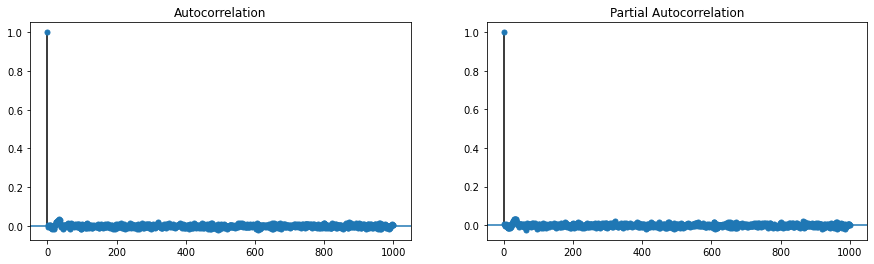

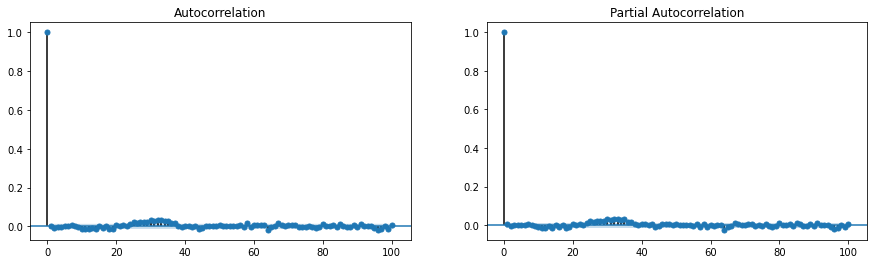

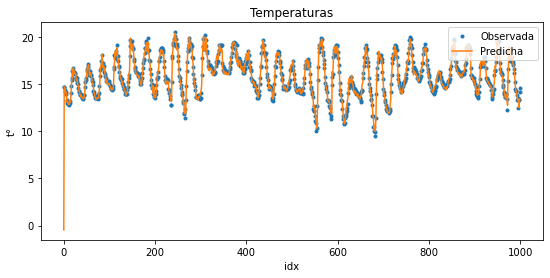

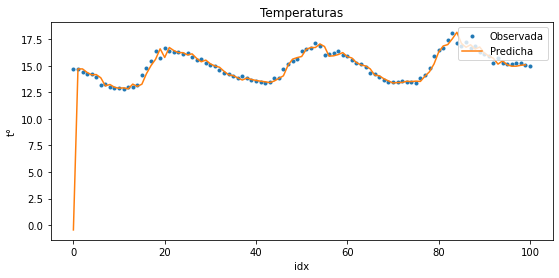

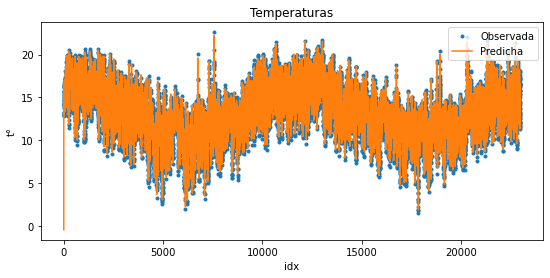

In [60]:
mysarimax(Y=Matriz_Resultados['ts'],
         order=(60*27/Intervalo,1,0),
         seasonal_order=(0,0,1,60*24/Intervalo),
         Matriz=IG.loc[:,['tMin12Horas', 'tMax12Horas']])

/home/matias/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


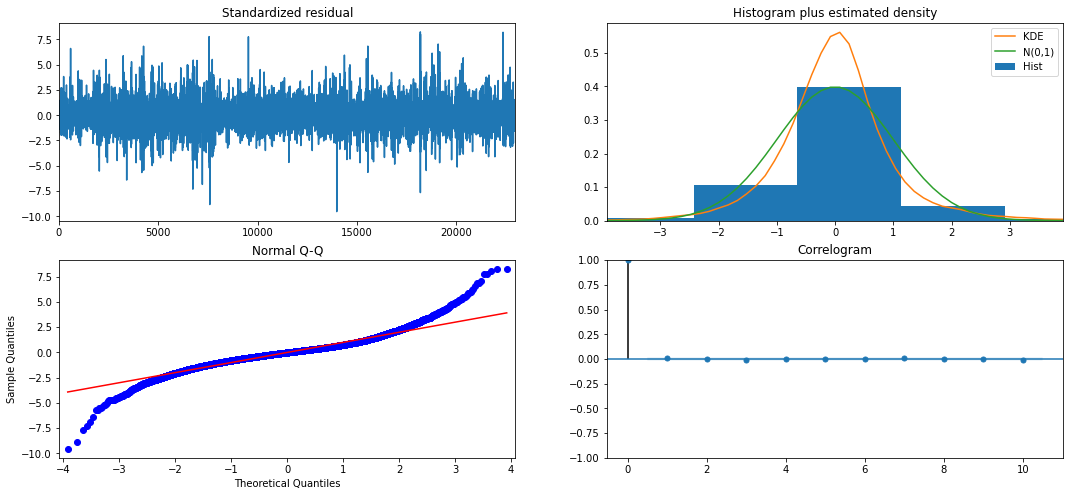

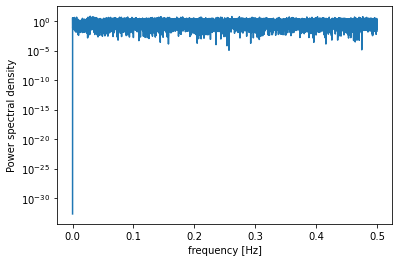

           freq       pow      delay
666    0.028983  6.617798  34.503003
6013   0.261674  5.862991   3.821553
10952  0.476609  5.580801   2.098156
3330   0.144915  5.436499   6.900601
9246   0.402367  5.371901   2.485291
6298   0.274076  5.305844   3.648619
653    0.028417  5.242048  35.189893
8179   0.355934  5.070701   2.809512
4155   0.180817  5.051134   5.530445
8843   0.384830  4.980359   2.598553
                                       SARIMAX Results                                       
Dep. Variable:                                    ts   No. Observations:                22979
Model:             SARIMAX(36, 1, 0)x(0, 0, [1], 32)   Log Likelihood              -20274.043
Date:                               Sun, 09 Aug 2020   AIC                          40630.086
Time:                                       00:22:38   BIC                          40959.820
Sample:                                            0   HQIC                         40737.244
                             

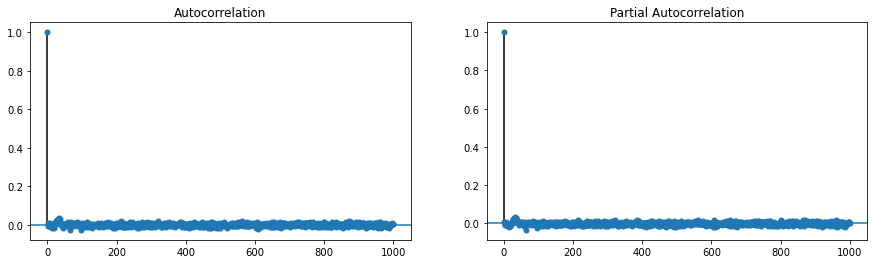

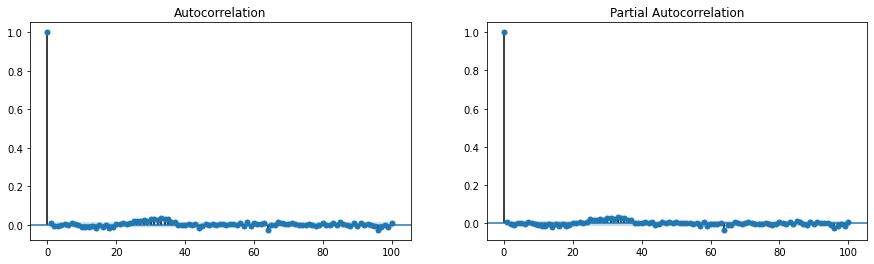

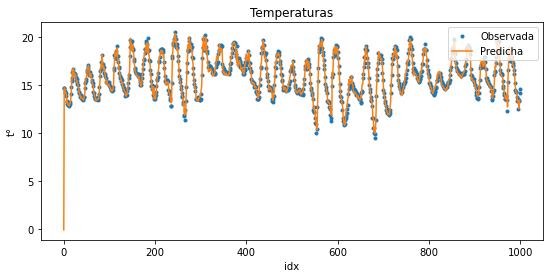

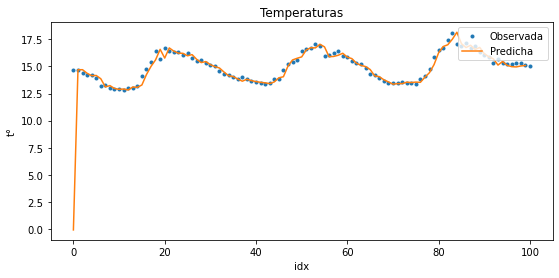

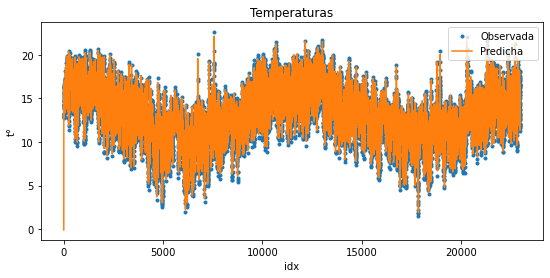

In [61]:
mysarimax(Y=Matriz_Resultados['ts'],
         order=(60*27/Intervalo,1,0),
         seasonal_order=(0,0,1,60*24/Intervalo),
         Matriz=IG.loc[:,['Hora_Min_t', 'Hora_Max_t']])

In [ ]:
seasonal_order=(1,0,1,60*24/Intervalo)
Matriz=IG2